<이진분류 : 데이터를 두가지 클래스(0 or 1, 참 or 거짓)로 분류하는 문제>

## 1 문제정의
- 미국의 인구조사 데이터(1994)를 바탕으로 만들어진 데이터
- 이 데이터에서 각 사람의 소득을 예측하려는 것이 목적
- 나이, 결혼여부, 직종 등의 컬럼이 있음
- income : 연소득 $50,000 초과 or 이하로 구분 -> 이진분류 
- 평가기준 : ROC-AUC
- 제출파일은 예측값만 result.csv 파일로 생성

문제풀이
- 사람이 가진 다양한 정보(독립변수)를 보고 연봉이 $50,000 이상인지 이하인지를 예측하는 문제
- 입력(독립변수) : 나이, 결혼여부, 직종, 학력, 근무시간 등 
- 출력(종속변수) : 소득이 >50K or <=50K 인지 

In [1]:
# 판다스 라이브러리
import pandas as pd

# 데이터 불러오기
# 아래 링크로 들어가서 메모장으로 붙여넣어서 파일 생성
train = pd.read_csv('origin/train.csv')
test = pd.read_csv('origin/test.csv')
# train = pd.read_csv('https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch2/train.csv')
# test = pd.read_csv('https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch2/test.csv')

train # train -> income : 종속변수임을 확인
# test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3331,34.0,State-gov,177331,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,4386,0,40.0,United-States,>50K
1,19749,58.0,Private,290661,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States,<=50K
2,1157,48.0,Private,125933,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,1669,38.0,United-States,<=50K
3,693,58.0,Private,100313,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,40.0,United-States,>50K
4,12522,41.0,Private,195661,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,54.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,15999,28.0,Private,47168,10th,6,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40.0,United-States,<=50K
29300,21604,44.0,Local-gov,231793,Doctorate,16,Married-spouse-absent,Prof-specialty,Unmarried,White,Female,0,0,38.0,United-States,<=50K
29301,26839,41.0,Local-gov,201435,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40.0,United-States,<=50K
29302,16681,43.0,Private,137722,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40.0,United-States,<=50K


## 2 탐색적 데이터 분석(EDA)
- 데이터 구조 파악 : 행, 열, 데이터 타입, 결측치 확인
- 데이터 요약 및 통계량 확인 : 기본 통계량(평균, 중앙값, 표준편차, 분포 등) 
- 변수 간 관계 탐색 : 상관분석, 교차표, 그룹별 비교
- 시각화 도구 활용 : 히스토그램, 박스플롯, 막대그래프, 산점도 등
- 모델링 전 데이터 이해 : 가설 설정 가능

### 데이터 구조 파악

In [2]:
# 데이터 샘플 - 간단 구조 파악
train.head()
train.tail()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
29299,15999,28.0,Private,47168,10th,6,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40.0,United-States,<=50K
29300,21604,44.0,Local-gov,231793,Doctorate,16,Married-spouse-absent,Prof-specialty,Unmarried,White,Female,0,0,38.0,United-States,<=50K
29301,26839,41.0,Local-gov,201435,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40.0,United-States,<=50K
29302,16681,43.0,Private,137722,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40.0,United-States,<=50K
29303,16069,22.0,Private,406978,Bachelors,13,Never-married,Exec-managerial,Other-relative,White,Female,0,0,40.0,United-States,<=50K


In [3]:
# 데이터 크기 확인(행, 열)
# 데이터 크기 분석 train : test = 약 9 : 1 비율
train.shape, test.shape

((29304, 16), (3257, 15))

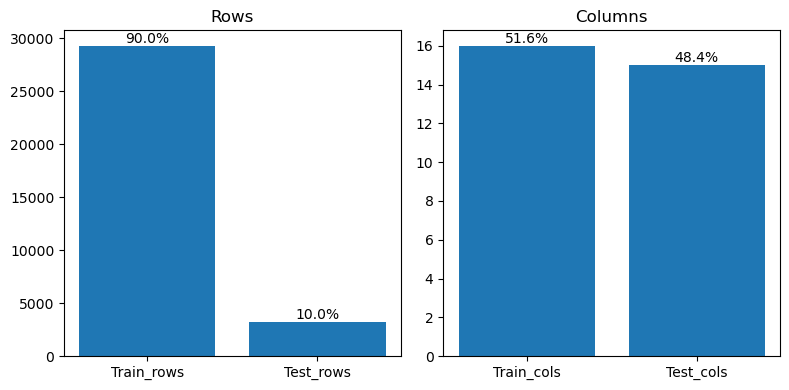

In [4]:
# 시각화1 - 전체 분포 비율 확인
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8,4))

# 행 개수
rows = [train.shape[0], test.shape[0]]
axes[0].bar(['Train_rows','Test_rows'], rows)
for i, v in enumerate(rows):
    axes[0].text(i, v, f"{v/sum(rows):.1%}", ha='center', va='bottom')
axes[0].set_title("Rows")

# 열 개수
cols = [train.shape[1], test.shape[1]]
axes[1].bar(['Train_cols','Test_cols'], cols)
for i, v in enumerate(cols):
    axes[1].text(i, v, f"{v/sum(cols):.1%}", ha='center', va='bottom')
axes[1].set_title("Columns")

plt.tight_layout()
plt.show()

In [5]:
### 2) 자료형 타입 확인

In [6]:
train.info()

# 결측치 확인 : age, workclass, occupation, hours.per.week, native.country
# 수치형, 범주형 변수 구분
# 불필요한 변수 식별(id)
# 범주형 변수 처리 전략 수립

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29304 entries, 0 to 29303
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29304 non-null  int64  
 1   age             29292 non-null  float64
 2   workclass       27642 non-null  object 
 3   fnlwgt          29304 non-null  int64  
 4   education       29304 non-null  object 
 5   education.num   29304 non-null  int64  
 6   marital.status  29304 non-null  object 
 7   occupation      27636 non-null  object 
 8   relationship    29304 non-null  object 
 9   race            29304 non-null  object 
 10  sex             29304 non-null  object 
 11  capital.gain    29304 non-null  int64  
 12  capital.loss    29304 non-null  int64  
 13  hours.per.week  29291 non-null  float64
 14  native.country  28767 non-null  object 
 15  income          29304 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 3.6+ MB


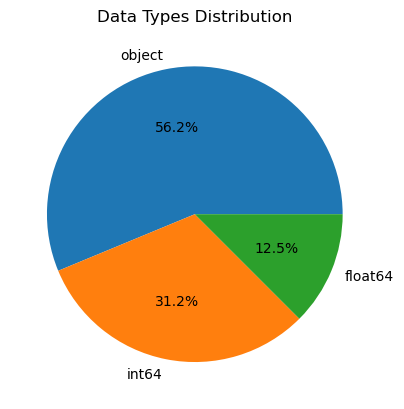

In [7]:
# 자료형 시각화
dtype_counts = train.dtypes.value_counts()
plt.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
plt.title('Data Types Distribution')
plt.show()

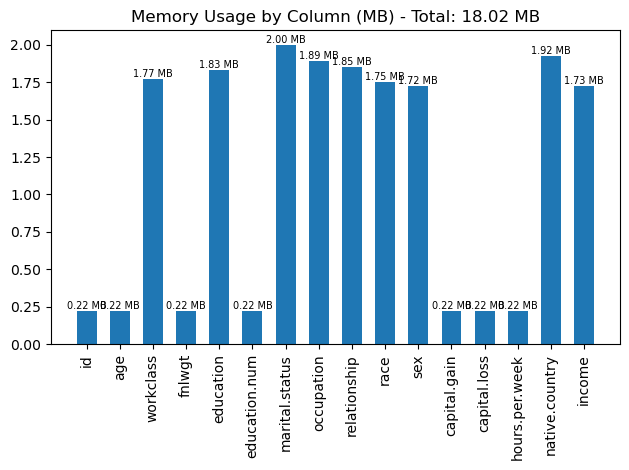

In [8]:
# 메모리 사용량
import matplotlib.pyplot as plt

mem_mb = train.memory_usage(deep=True, index=False) / 1024**2
total = mem_mb.sum()

bars = plt.bar(range(len(train.columns)), mem_mb, width=0.6)
plt.title(f'Memory Usage by Column (MB) - Total: {total:.2f} MB')
plt.xticks(range(len(train.columns)), train.columns, rotation=90)
plt.gca().bar_label(bars, fmt="%.2f MB", fontsize=7)
plt.tight_layout()
plt.show()

### 수치형 데이터

In [9]:
# train 수치형 통계량 확인
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,29304.000000,29292.000000,2.930400e+04,29304.000000,29304.000000,29304.000000,29291.000000
mean,16264.027880,38.553223,1.897488e+05,10.080842,1093.858722,86.744506,40.434229
std,9384.518323,13.628811,1.055250e+05,2.570824,7477.435640,401.518928,12.324036
min,0.000000,-38.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8145.750000,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,16253.500000,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000
75%,24374.250000,48.000000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


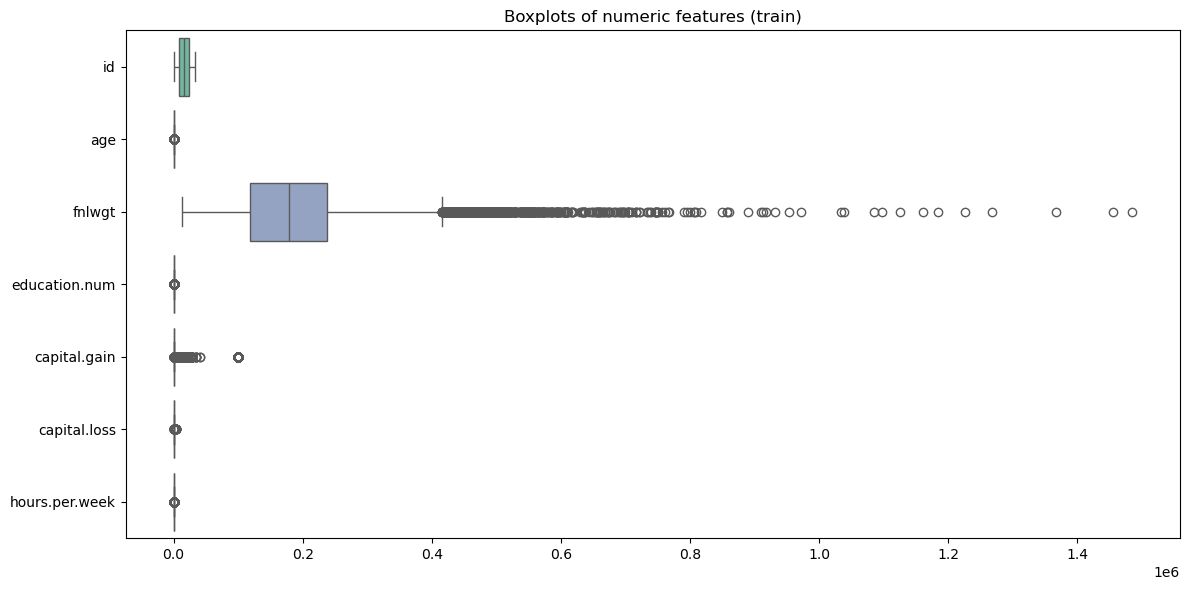

In [10]:
# --------------------------
# 시각화 - 박스플롯 - 박스플롯이란 : https://yoon1seok.tistory.com/38
# --------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼만 추출
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=train[numeric_cols], orient="h", palette="Set2")
plt.title("Boxplots of numeric features (train)")
plt.tight_layout()
plt.show()

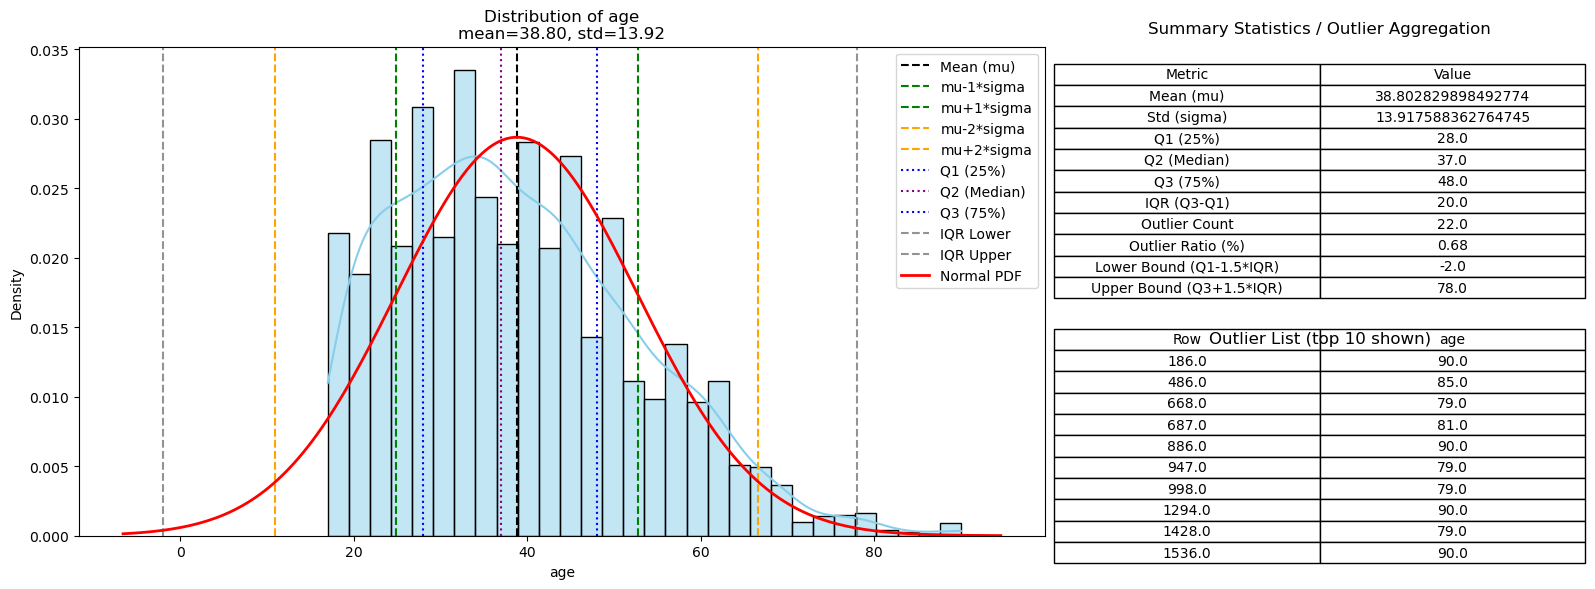

[Saved] Image: age_dist_summary_outliers.png


In [11]:
# =============================================================================
# 필요한 라이브러리 임포트
# =============================================================================
import matplotlib.pyplot as plt    # 그래프 생성을 위한 라이브러리
import seaborn as sns              # 통계 시각화 라이브러리 (matplotlib 기반)
import numpy as np                 # 수치 계산 라이브러리
import pandas as pd                # 데이터 프레임 조작 라이브러리
from matplotlib.gridspec import GridSpec  # subplot 레이아웃 관리

def analyze_distribution(data, col):
    """
    데이터 분포 분석 및 시각화 함수
    
    Parameters:
    - data: DataFrame, 분석할 데이터
    - col: str, 분석할 컬럼명
    
    기능:
    1. 기술통계량 계산 (평균, 표준편차, 분위수 등)
    2. 아웃라이어 탐지
    3. 분포 시각화 (히스토그램 + 통계선들)
    4. 요약 테이블 생성
    """
    
    # =============================================================================
    # 1. 데이터 전처리 - 결측치 제거
    # =============================================================================
    data_clean = data[col].dropna()  # NaN 값 제거한 깨끗한 데이터
    
    # =============================================================================
    # 2. 기본 통계량 계산
    # =============================================================================
    stats = {
        'mean': data_clean.mean(),        # 평균 (μ)
        'std': data_clean.std(),          # 표준편차 (σ)
        'q1': data_clean.quantile(0.25),  # 1사분위수 (25%)
        'q2': data_clean.quantile(0.5),   # 2사분위수 (중위수, 50%)
        'q3': data_clean.quantile(0.75)   # 3사분위수 (75%)
    }
    
    # =============================================================================
    # 3. IQR 기반 아웃라이어 경계값 계산
    # =============================================================================
    stats.update({
        'iqr': stats['q3'] - stats['q1'],                           # IQR (사분범위)
        'lower_bound': stats['q1'] - 1.5 * (stats['q3'] - stats['q1']),  # 하한선
        'upper_bound': stats['q3'] + 1.5 * (stats['q3'] - stats['q1'])   # 상한선
    })
    
    # =============================================================================
    # 4. 아웃라이어 탐지
    # =============================================================================
    # 아웃라이어 마스크: 하한선 미만 또는 상한선 초과인 데이터 찾기
    outlier_mask = (data_clean < stats['lower_bound']) | (data_clean > stats['upper_bound'])
    
    # 아웃라이어 데이터프레임 생성 (인덱스, 컬럼명, 값 포함)
    outliers_df = data_clean[outlier_mask].to_frame(col).reset_index().rename(columns={'index': 'Row'})
    
    # =============================================================================
    # 5. 요약 통계 테이블 생성
    # =============================================================================
    summary = pd.DataFrame({
        'Metric': [
            'Mean (mu)', 'Std (sigma)', 'Q1 (25%)', 'Q2 (Median)', 'Q3 (75%)', 
            'IQR (Q3-Q1)', 'Outlier Count', 'Outlier Ratio (%)', 
            'Lower Bound (Q1-1.5*IQR)', 'Upper Bound (Q3+1.5*IQR)'
        ],
        'Value': [
            stats['mean'], stats['std'], stats['q1'], stats['q2'], stats['q3'], 
            stats['iqr'], len(outliers_df), 
            round(len(outliers_df)/len(data_clean)*100, 2) if len(data_clean) else 0,
            stats['lower_bound'], stats['upper_bound']
        ]
    })
    
    # 각 통계 지표 설명:
    # - Mean (mu): 데이터의 산술평균, 중심위치 나타냄
    # - Std (sigma): 표준편차, 데이터의 퍼짐 정도 (작을수록 집중)
    # - Q1 (25%): 1사분위수, 데이터를 오름차순 정렬했을 때 25% 지점
    # - Q2 (Median): 2사분위수(중위수), 50% 지점, 평균보다 이상값에 덜 민감
    # - Q3 (75%): 3사분위수, 75% 지점
    # - IQR (Q3-Q1): 사분범위, Q3-Q1으로 중간 50% 데이터의 범위
    # - Outlier Count: IQR 방법으로 탐지된 이상값 개수
    # - Outlier Ratio (%): 전체 데이터 대비 이상값 비율
    # - Lower Bound: 이상값 판정 하한선 (Q1-1.5*IQR)
    # - Upper Bound: 이상값 판정 상한선 (Q3+1.5*IQR)
    
    # =============================================================================
    # 6. 시각화 레이아웃 설정 (2x2 그리드)
    # =============================================================================
    fig = plt.figure(figsize=(16, 6))  # 전체 figure 크기 설정
    # GridSpec: 왼쪽은 넓게(분포도), 오른쪽은 좁게(테이블들)
    gs = GridSpec(2, 2, figure=fig, width_ratios=[2, 1], height_ratios=[3, 2])
    
    # =============================================================================
    # 7. 메인 분포 그래프 (왼쪽 전체 영역)
    # =============================================================================
    ax = fig.add_subplot(gs[:, 0])  # 왼쪽 전체 영역 사용
    
    # 히스토그램 + KDE(커널밀도추정) 곡선 그리기
    sns.histplot(data_clean, kde=True, stat="density", bins=30, color="skyblue", ax=ax)
    
    # =============================================================================
    # 8. 통계적 기준선들을 그래프에 추가
    # =============================================================================
    # (값, 색상, 선 스타일, 라벨) 형태의 튜플 리스트
    lines = [
        # 평균과 표준편차 기준선들
        (stats['mean'], 'black', '--', 'Mean (mu)'),                    # 평균선
        (stats['mean'] - stats['std'], 'green', '--', 'mu-1*sigma'),    # 평균-1표준편차
        (stats['mean'] + stats['std'], 'green', '--', 'mu+1*sigma'),    # 평균+1표준편차
        (stats['mean'] - 2*stats['std'], 'orange', '--', 'mu-2*sigma'), # 평균-2표준편차
        (stats['mean'] + 2*stats['std'], 'orange', '--', 'mu+2*sigma'), # 평균+2표준편차
        
        # 분위수 기준선들
        (stats['q1'], 'blue', ':', 'Q1 (25%)'),         # 1사분위수
        (stats['q2'], 'purple', ':', 'Q2 (Median)'),    # 중위수
        (stats['q3'], 'blue', ':', 'Q3 (75%)'),         # 3사분위수
        
        # 아웃라이어 경계선들
        (stats['lower_bound'], '#666666', '--', 'IQR Lower'),  # IQR 하한선
        (stats['upper_bound'], '#666666', '--', 'IQR Upper')   # IQR 상한선
    ]
    
    # 모든 기준선을 반복문으로 그리기
    for val, color, style, label in lines:
        ax.axvline(val, color=color, linestyle=style, 
                  alpha=0.7 if color=='#666666' else 1, label=label)
    
    # =============================================================================
    # 9. 정규분포 확률밀도함수(PDF) 곡선 추가
    # =============================================================================
    if stats['std'] > 0:  # 표준편차가 0이 아닐 때만 그리기
        x = np.linspace(ax.get_xlim()[0], ax.get_ylim()[1], 200)  # x축/밀도 범위 기반
        # 정규분포 PDF 공식: f(x) = 1/(σ√2π) * e^(-(x-μ)²/2σ²)
        # (주의: 여기서는 x 범위를 적절히 조정하여 사용하세요)
        x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
        pdf = (1/(stats['std']*np.sqrt(2*np.pi))) * np.exp(-(x-stats['mean'])**2/(2*stats['std']**2))
        ax.plot(x, pdf, 'r', linewidth=2, label="Normal PDF")
    
    # 그래프 제목과 범례 설정
    ax.set_title(f"Distribution of {col}\nmean={stats['mean']:.2f}, std={stats['std']:.2f}")
    ax.legend(loc="best")
    
    # =============================================================================
    # 10. 우측 상단: 요약통계 테이블
    # =============================================================================
    # 우측 하단: 아웃라이어 목록 테이블 (상위 10개만 표시)
    outlier_title = "Outlier List" + ("" if len(outliers_df) <= 10 else " (top 10 shown)")
    
    for i, (subplot, data_table, title) in enumerate([
        (gs[0, 1], summary, "Summary Statistics / Outlier Aggregation"),          # 상단 테이블
        (gs[1, 1], outliers_df.head(10), outlier_title)  # 하단 테이블
    ]):
        ax_table = fig.add_subplot(subplot)
        ax_table.axis('off')  # 축 제거 (테이블만 보이게)
        
        # 테이블 생성 및 스타일 설정
        table = ax_table.table(cellText=data_table.values, colLabels=data_table.columns,
                              cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.1, 1.2)  # 테이블 크기 조정
        ax_table.set_title(title, pad=10, fontsize=12)
    
    # =============================================================================
    # 11. 최종 출력 및 저장
    # =============================================================================
    plt.tight_layout()  # 레이아웃 자동 조정
    plt.savefig(f"{col}_dist_summary_outliers.png", dpi=200, bbox_inches="tight")  # 고화질 이미지 저장
    plt.show()          # 그래프 화면에 표시
    
    # 저장 완료 메시지 출력
    print(f"[Saved] Image: {col}_dist_summary_outliers.png")

# =============================================================================
# 사용 예시
# =============================================================================
col = "age"  # 분석할 컬럼명 지정
analyze_distribution(test, col)  # 함수 실행

In [12]:
# test 수치형 통계량 확인
test.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3257.000000,3251.000000,3.257000e+03,3257.000000,3257.000000,3257.000000,3248.000000
mean,16423.704943,38.802830,1.900447e+05,10.079214,931.804728,92.336199,40.468288
std,9535.416746,13.917588,1.057902e+05,2.590118,6496.962999,415.732721,12.598546
min,3.000000,17.000000,1.882700e+04,1.000000,0.000000,0.000000,1.000000
25%,8078.000000,28.000000,1.186520e+05,9.000000,0.000000,0.000000,40.000000
50%,16626.000000,37.000000,1.783190e+05,10.000000,0.000000,0.000000,40.000000
75%,24743.000000,48.000000,2.364360e+05,12.000000,0.000000,0.000000,45.000000
max,32559.000000,90.000000,1.033222e+06,16.000000,99999.000000,3900.000000,99.000000


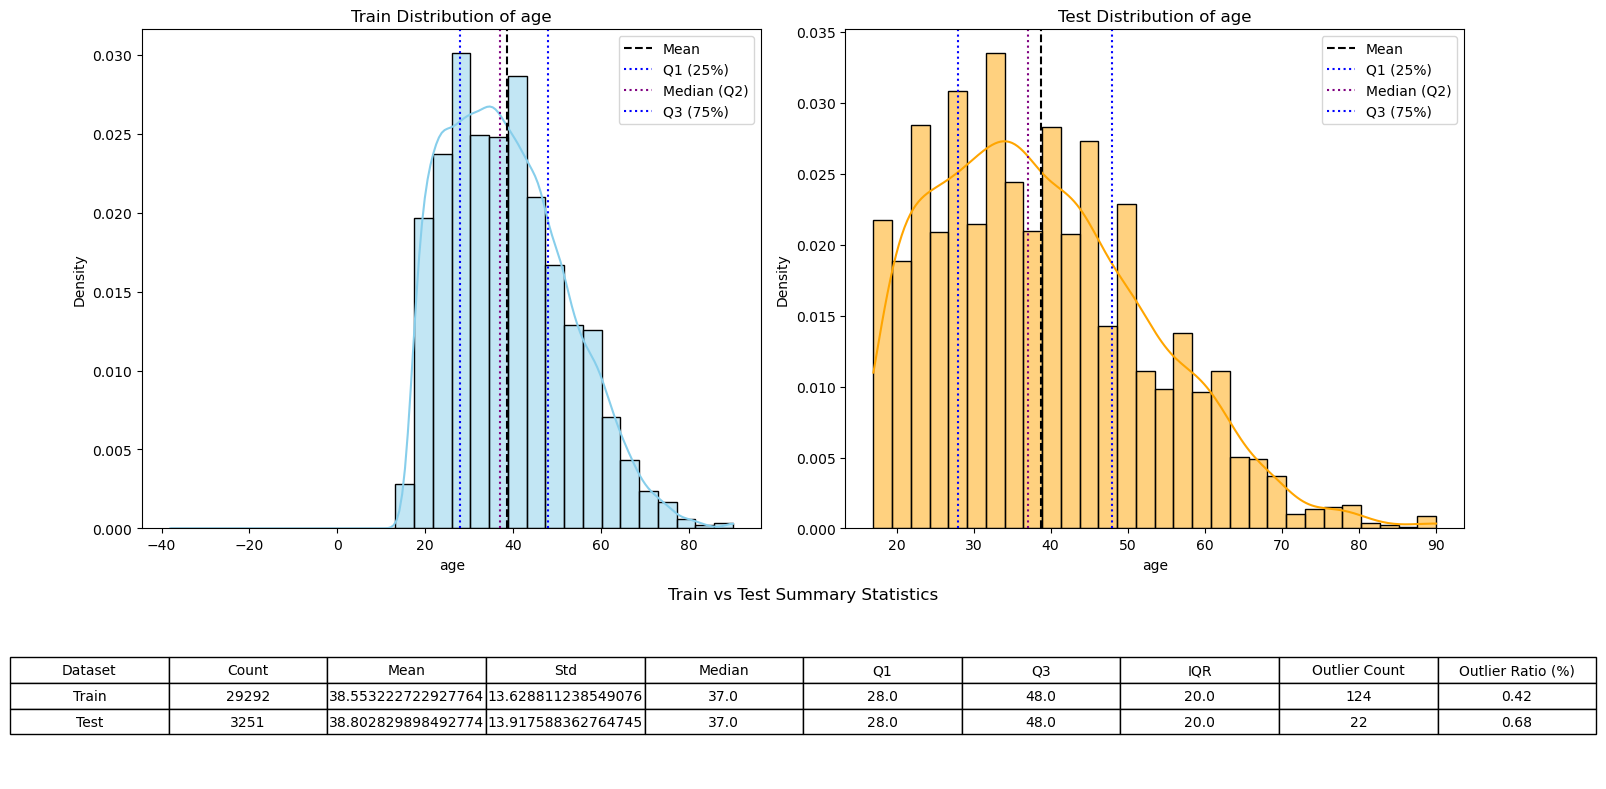

[Saved] Comparison Image: age_train_test_comparison.png


In [13]:
# =============================================================================
# Train vs Test 분포 비교 분석 - 최적화 버전
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

def compare_distributions(train_data, test_data, col):
    """
    Train과 Test 데이터셋의 분포를 비교 분석하는 함수
    
    Parameters:
    - train_data: DataFrame, 훈련 데이터
    - test_data: DataFrame, 테스트 데이터  
    - col: str, 분석할 컬럼명
    
    기능:
    1. 두 데이터셋의 기술통계량 계산 및 비교
    2. 분포 시각화 (Train vs Test)
    3. 요약 통계 테이블 생성
    """
    
    # =============================================================================
    # 1. 데이터 전처리 및 통계 요약 생성
    # =============================================================================
    datasets = {
        'Train': train_data[col].dropna(),
        'Test': test_data[col].dropna()
    }
    
    # 각 데이터셋에 대한 통계 요약 계산
    summaries = []
    for name, data in datasets.items():
        q1, q2, q3 = data.quantile([0.25, 0.5, 0.75])
        iqr = q3 - q1
        outlier_mask = (data < q1 - 1.5*iqr) | (data > q3 + 1.5*iqr)
        
        summaries.append({
            "Dataset": name, "Count": len(data), "Mean": data.mean(), "Std": data.std(),
            "Median": q2, "Q1": q1, "Q3": q3, "IQR": iqr,
            "Outlier Count": int(outlier_mask.sum()),
            "Outlier Ratio (%)": round(outlier_mask.sum()/len(data)*100, 2) if len(data) else 0
        })
    
    summary_df = pd.DataFrame(summaries)
    
    # =============================================================================
    # 2. 시각화 설정 (2x1 분포 + 하단 테이블)
    # =============================================================================
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(2, 2, figure=fig, height_ratios=[3, 1])
    
    # =============================================================================
    # 3. 분포 그래프 생성 (Train, Test)
    # =============================================================================
    colors = ['skyblue', 'orange']
    for i, (name, data) in enumerate(datasets.items()):
        ax = fig.add_subplot(gs[0, i])
        
        # 히스토그램 + KDE
        sns.histplot(data, kde=True, stat="density", bins=30, color=colors[i], ax=ax)
        
        # 통계 기준선 추가
        stats = summary_df.iloc[i]
        lines = [
            (data.mean(), 'black', '--', 'Mean'),
            (stats['Q1'], 'blue', ':', 'Q1 (25%)'),
            (stats['Median'], 'purple', ':', 'Median (Q2)'),
            (stats['Q3'], 'blue', ':', 'Q3 (75%)')
        ]
        
        for val, color, style, label in lines:
            ax.axvline(val, color=color, linestyle=style, label=label)
        
        ax.set_title(f"{name} Distribution of {col}")
        ax.legend()
    
    # =============================================================================
    # 4. 하단 요약 통계 테이블
    # =============================================================================
    ax_table = fig.add_subplot(gs[1, :])
    ax_table.axis('off')
    
    table = ax_table.table(cellText=summary_df.values, colLabels=summary_df.columns,
                          cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.3)
    ax_table.set_title("Train vs Test Summary Statistics", pad=10, fontsize=12)
    
    # =============================================================================
    # 5. 최종 출력 및 저장
    # =============================================================================
    plt.tight_layout()
    plt.savefig(f"{col}_train_test_comparison.png", dpi=200, bbox_inches="tight")
    plt.show()
    print(f"[Saved] Comparison Image: {col}_train_test_comparison.png")

# =============================================================================
# 사용 예시
# =============================================================================
col = "age"
compare_distributions(train, test, col)

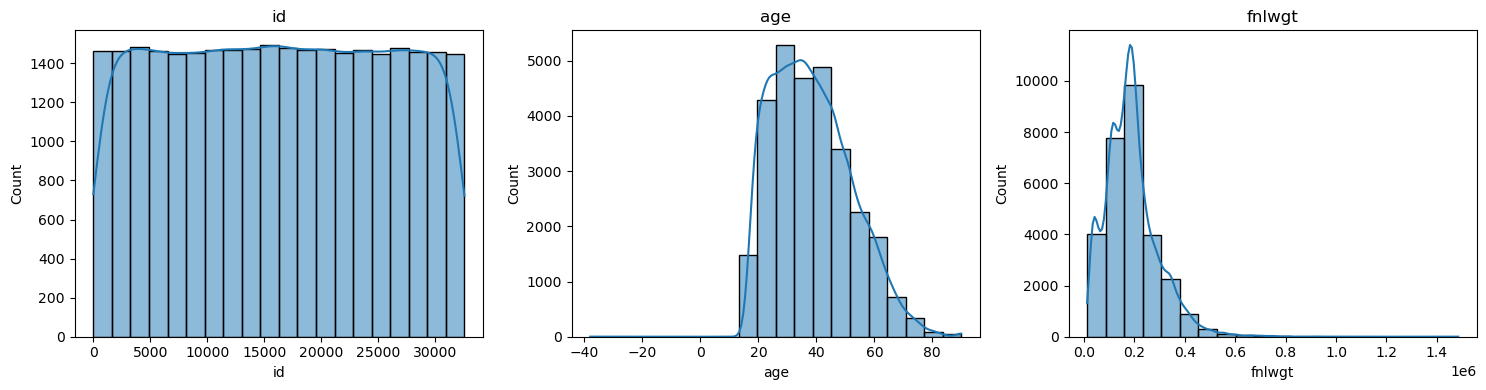

In [14]:
# 수치형 데이터 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = train.select_dtypes(include=[np.number]).columns[:3]

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(train[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

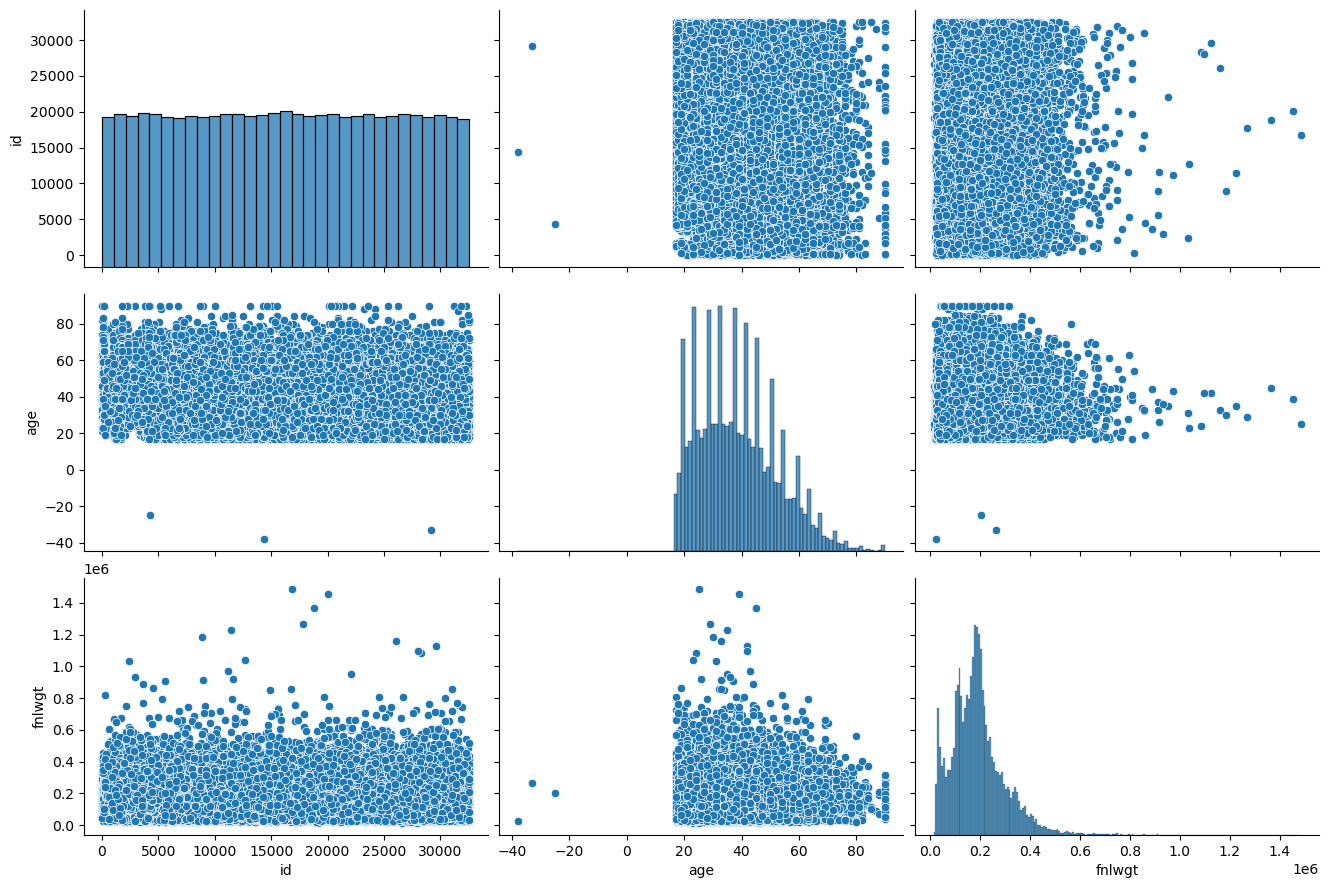

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train[numeric_cols].dropna(), height=3, aspect=1.5)  # aspect로 가로 길이 조절
plt.show()

# =============================================================================
# 시각화 결과 해석 - Seaborn Pairplot
# =============================================================================
#  그래프 종류:
# - pairplot: 여러 수치형 변수들의 "산점도 행렬(scatterplot matrix)"을 보여주는 시각화 도구
# - 각 변수 조합별 산점도를 그리고, 대각선(diagonal)에는 히스토그램(분포) 표시
#
#   얻을 수 있는 분석:
# 1. 변수 간 관계 파악
#    - age, fnlwgt 등 수치형 변수들 사이의 상관성(positive/negative)을 직관적으로 확인 가능
#    - 산점도에서 특정한 패턴(선형, 곡선, 군집 형태 등)을 통해 관계성을 추정할 수 있음
#
# 2. 이상치(outlier) 탐지
#    - 산점도에서 극단적으로 떨어져 있는 점들을 통해 이상치 후보를 쉽게 발견 가능
#    - 예: fnlwgt가 비정상적으로 높은 일부 샘플
#
# 3. 분포 특성 확인
#    - 대각선 히스토그램을 통해 각 변수의 분포(정규성, 치우침 여부, 첨도)를 파악 가능
#    - 예: age는 20~40대에 집중, fnlwgt는 오른쪽 꼬리가 긴 분포(positive skew)
#
# 4. 다중 공선성(multicollinearity) 탐색
#    - 두 변수가 강한 선형관계를 보이면 회귀분석 시 다중공선성 문제 발생 가능
#
# 5. 데이터 스케일 차이 확인
#    - 변수마다 값의 범위가 크게 다르면, 한쪽 축에 데이터가 몰려 있는 모습으로 확인됨
#    - 예: fnlwgt는 수십만 단위, age는 10~80 단위
#
#   활용 팁:
# - sns.pairplot(train[numeric_cols], diag_kind="kde") 로 커널밀도추정 그래프 사용 가능
# - hue 옵션으로 타깃(y) 값에 따라 색상 구분하면 클래스 간 분포

In [16]:
# =============================================================================
# 필요한 라이브러리 임포트
# =============================================================================
import numpy as np                              # 수치 계산 라이브러리
import pandas as pd                             # 데이터프레임 처리 라이브러리
from scipy.stats import ks_2samp, chi2_contingency  # 통계 검정 함수들
from IPython.display import display, Markdown  # Jupyter 노트북 출력용

def make_key_metrics_table(train, test, numeric_cols=None, categorical_cols=None, title="Train vs Test Key Metrics"):
    """
    Train/Test 데이터셋 비교 핵심 지표 테이블 생성 함수
    
    Parameters:
    - train, test: 비교할 데이터프레임
    - numeric_cols: 수치형 컬럼 리스트 (None시 자동 감지)
    - categorical_cols: 범주형 컬럼 리스트 (None시 자동 감지)
    - title: 테이블 제목
    """
    
    # =============================================================================
    # 1. 컬럼 타입 자동 감지 (수치형 vs 범주형)
    # =============================================================================
    if not numeric_cols and not categorical_cols:
        # 수치형 컬럼: int, float 타입 자동 감지
        numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
        # 범주형 컬럼: 수치형이 아닌 나머지 컬럼들
        categorical_cols = [c for c in train.columns if c not in numeric_cols]
    
    # None 값 처리 (빈 리스트로 초기화)
    numeric_cols = numeric_cols or []
    categorical_cols = categorical_cols or []
    
    # =============================================================================
    # 2. 유틸리티 함수 정의
    # =============================================================================
    # 안전한 백분율 계산 (0으로 나누기 방지)
    safe_pct = lambda n, d: (n/d*100) if d else 0.0
    
    def get_outlier_pct(series):
        """
        IQR(사분범위) 방법으로 아웃라이어 비율 계산
        - 아웃라이어 정의: Q1-1.5*IQR 미만 또는 Q3+1.5*IQR 초과
        """
        s = pd.to_numeric(series, errors="coerce").dropna()  # 숫자 변환 + 결측치 제거
        if s.empty: return 0.0  # 데이터가 없으면 0% 반환
        
        q1, q3 = s.quantile([0.25, 0.75])  # 1사분위수, 3사분위수
        iqr = q3 - q1                       # 사분범위 계산
        # 아웃라이어 개수 계산
        outliers = ((s < q1-1.5*iqr) | (s > q3+1.5*iqr)).sum()
        return safe_pct(outliers, len(s))   # 비율로 변환
    
    def get_ks_pvalue(tr_series, te_series):
        """
        KS Test (Kolmogorov-Smirnov Test) p-value 계산
        - 두 수치형 데이터의 분포가 같은지 검정
        - p < 0.05면 분포가 다르다고 판단 (분포 shift 존재)
        """
        try:
            tr_clean = pd.to_numeric(tr_series, errors="coerce").dropna()  # Train 데이터 정리
            te_clean = pd.to_numeric(te_series, errors="coerce").dropna()  # Test 데이터 정리
            
            # 양쪽 데이터가 모두 있을 때만 KS Test 실행
            return ks_2samp(tr_clean, te_clean).pvalue if len(tr_clean) and len(te_clean) else np.nan
        except: 
            return np.nan  # 오류 발생시 NaN 반환
    
    def get_chi2_pvalue(tr_series, te_series):
        """
        Chi-square Test (카이제곱 검정) p-value 계산
        - 두 범주형 데이터의 분포가 같은지 검정
        - p < 0.05면 범주별 비율이 다르다고 판단
        """
        try:
            # 각 데이터셋의 범주별 개수 계산
            tr_counts = tr_series.value_counts(dropna=True)  # Train 범주 빈도
            te_counts = te_series.value_counts(dropna=True)  # Test 범주 빈도
            
            # 모든 범주 통합 (Train, Test에 없는 범주도 포함)
            all_cats = list(set(tr_counts.index) | set(te_counts.index))
            
            # 분할표(contingency table) 생성
            contingency = np.vstack([
                tr_counts.reindex(all_cats, fill_value=0).values,  # Train 빈도
                te_counts.reindex(all_cats, fill_value=0).values   # Test 빈도
            ])
            
            # Chi-square 검정 실행 (연속성 보정 없음)
            return chi2_contingency(contingency, correction=False)[1] if contingency.size else np.nan
        except: 
            return np.nan  # 오류 발생시 NaN 반환
    
    # =============================================================================
    # 3. 각 컬럼별 지표 계산 및 테이블 데이터 생성
    # =============================================================================
    rows = []  # 테이블 행 데이터를 저장할 리스트
    
    # 수치형 컬럼들 처리
    for col in numeric_cols:
        if col in train.columns and col in test.columns:
            tr, te = train[col], test[col]
            
            rows.append({
                "Column": col,                                                          # 컬럼명
                "Type": "numeric",                                                      # 데이터 타입
                "KS Test p": get_ks_pvalue(tr, te),                                   # KS 검정 p-value
                "Missing (Train %)": round(safe_pct(tr.isna().sum(), len(train)), 2), # Train 결측률
                "Missing (Test %)": round(safe_pct(te.isna().sum(), len(test)), 2),   # Test 결측률
                "Outliers (Train %, IQR)": round(get_outlier_pct(tr), 2),            # Train 아웃라이어율
                "Outliers (Test %, IQR)": round(get_outlier_pct(te), 2),             # Test 아웃라이어율
                "Chi-square p": np.nan                                                 # 수치형은 해당없음
            })
    
    # 범주형 컬럼들 처리  
    for col in categorical_cols:
        if col in train.columns and col in test.columns:
            tr, te = train[col], test[col]
            
            rows.append({
                "Column": col,                                                          # 컬럼명
                "Type": "categorical",                                                  # 데이터 타입
                "KS Test p": np.nan,                                                   # 범주형은 해당없음
                "Missing (Train %)": round(safe_pct(tr.isna().sum(), len(train)), 2), # Train 결측률
                "Missing (Test %)": round(safe_pct(te.isna().sum(), len(test)), 2),   # Test 결측률
                "Outliers (Train %, IQR)": np.nan,                                    # 범주형은 해당없음
                "Outliers (Test %, IQR)": np.nan,                                     # 범주형은 해당없음
                "Chi-square p": get_chi2_pvalue(tr, te)                               # 카이제곱 검정 p-value
            })
    
    # =============================================================================
    # 4. 테이블 생성 및 화면 출력
    # =============================================================================
    table = pd.DataFrame(rows)
    display(Markdown(f"### {title}"))   # 마크다운 제목 출력
    display(table)                       # 결과 테이블 출력
    return table                         # 테이블 반환 (추가 분석용)

# =============================================================================
# 통계 검정 개념 설명
# =============================================================================
print("=" * 60)
print(" 통계 검정 개념 설명")
print("=" * 60)
print()
print("KS Test (Kolmogorov-Smirnov Test):")
print("   - 두 수치형 데이터의 '분포'가 같은지 비교, 두 수치형 데이터의 분포 비교 (모양, 위치, 퍼짐)")
print("   - 분포의 모양, 위치, 퍼짐 정도를 종합적으로 검정")
print("   - 예: Train 나이분포 vs Test 나이분포가 비슷한가?")
print()
print(" Chi-square Test (카이제곱 검정):")
print("   - 두 범주형 데이터의 '비율'이 같은지 비교, 두 범주형 데이터의 비율 비교 (범주별 개수)") 
print("   - 각 범주별 개수/비율의 차이를 검정")
print("   - 예: Train 성별비율 vs Test 성별비율이 비슷한가?")
print()

# =============================================================================
# 지표 해석 가이드
# =============================================================================
print(" 지표 해석 가이드:")
print("- KS Test p < 0.05: 수치형 분포 차이 유의 → 분포 shift 위험")
print("- Chi-square p < 0.05: 범주형 분포 차이 유의 → 범주 불균형")  
print("- Missing/Outliers: Train vs Test 비율 유사하면 안정적")
print()
print(" p-value 해석:")
print("   - p < 0.05: 차이가 통계적으로 유의함 (우연이 아님)")
print("   - p ≥ 0.05: 차이가 우연일 가능성이 높음 (비슷하다고 봄)")

# =============================================================================
# 사용 
# =============================================================================
make_key_metrics_table(train, test)

 통계 검정 개념 설명

KS Test (Kolmogorov-Smirnov Test):
   - 두 수치형 데이터의 '분포'가 같은지 비교, 두 수치형 데이터의 분포 비교 (모양, 위치, 퍼짐)
   - 분포의 모양, 위치, 퍼짐 정도를 종합적으로 검정
   - 예: Train 나이분포 vs Test 나이분포가 비슷한가?

 Chi-square Test (카이제곱 검정):
   - 두 범주형 데이터의 '비율'이 같은지 비교, 두 범주형 데이터의 비율 비교 (범주별 개수)
   - 각 범주별 개수/비율의 차이를 검정
   - 예: Train 성별비율 vs Test 성별비율이 비슷한가?

 지표 해석 가이드:
- KS Test p < 0.05: 수치형 분포 차이 유의 → 분포 shift 위험
- Chi-square p < 0.05: 범주형 분포 차이 유의 → 범주 불균형
- Missing/Outliers: Train vs Test 비율 유사하면 안정적

 p-value 해석:
   - p < 0.05: 차이가 통계적으로 유의함 (우연이 아님)
   - p ≥ 0.05: 차이가 우연일 가능성이 높음 (비슷하다고 봄)


### Train vs Test Key Metrics

,Column,Type,KS Test p,Missing (Train %),Missing (Test %),"Outliers (Train %, IQR)","Outliers (Test %, IQR)",Chi-square p
0,id,numeric,0.183537,0.00,0.00,0.00,0.00,NaN
1,age,numeric,0.924185,0.04,0.18,0.42,0.68,NaN
2,fnlwgt,numeric,0.966506,0.00,0.00,3.04,3.19,NaN
3,education.num,numeric,0.920741,0.00,0.00,3.68,3.72,NaN
4,capital.gain,numeric,0.972978,0.00,0.00,8.39,7.77,NaN
5,capital.loss,numeric,1.000000,0.00,0.00,4.64,4.91,NaN
6,hours.per.week,numeric,0.999903,0.04,0.28,27.67,27.77,NaN
7,workclass,categorical,NaN,5.67,5.34,NaN,NaN,0.604697
8,education,categorical,NaN,0.00,0.00,NaN,NaN,0.207382
9,marital.status,categorical,NaN,0.00,0.00,NaN,NaN,0.811211


,Column,Type,KS Test p,Missing (Train %),Missing (Test %),"Outliers (Train %, IQR)","Outliers (Test %, IQR)",Chi-square p
0,id,numeric,0.183537,0.00,0.00,0.00,0.00,NaN
1,age,numeric,0.924185,0.04,0.18,0.42,0.68,NaN
2,fnlwgt,numeric,0.966506,0.00,0.00,3.04,3.19,NaN
3,education.num,numeric,0.920741,0.00,0.00,3.68,3.72,NaN
4,capital.gain,numeric,0.972978,0.00,0.00,8.39,7.77,NaN
5,capital.loss,numeric,1.000000,0.00,0.00,4.64,4.91,NaN
6,hours.per.week,numeric,0.999903,0.04,0.28,27.67,27.77,NaN
7,workclass,categorical,NaN,5.67,5.34,NaN,NaN,0.604697
8,education,categorical,NaN,0.00,0.00,NaN,NaN,0.207382
9,marital.status,categorical,NaN,0.00,0.00,NaN,NaN,0.811211


### 범주형 데이터
count : 전체 데이터수, unique : 고유한 범주의 개수, top : 가장 많이 등장한 범주

In [17]:
# train 범주형 컬럼 통계값 확인 
train.describe(include='O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,27642,29304,29304,27636,29304,29304,29304,28767,29304
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,20451,9449,13466,3683,11845,25022,19578,26240,22263


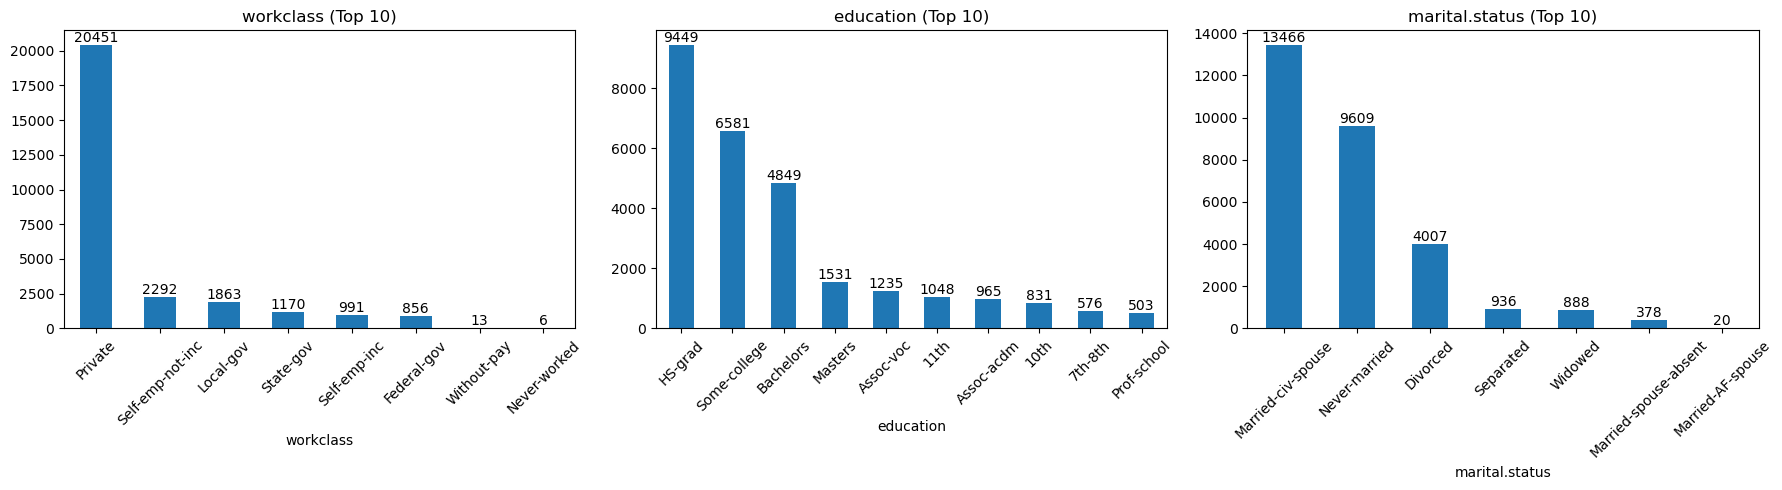

In [18]:
# 막대그래프(범주형 컬럼 전체 빈도수)
import matplotlib.pyplot as plt

categorical_cols = train.select_dtypes(include='object').columns[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, categorical_cols):
    train[col].value_counts().head(10).plot(kind='bar', ax=ax)
    ax.set_title(f'{col} (Top 10)')
    ax.tick_params(axis='x', rotation=45)
    ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [19]:
# # 막대그래프(최빈값빈도, 고유값 개수)
# fig, axes = plt.subplots(1, 2, figsize=(14,6))

# # 최빈값 빈도
# bars1 = axes[0].barh(desc.index, desc['freq'])
# axes[0].set_title("Top Category Frequency")
# axes[0].bar_label(bars1)

# # 고유값 개수
# bars2 = axes[1].barh(desc.index, desc['unique'])
# axes[1].set_title("Unique Categories Count")
# axes[1].bar_label(bars2)

# plt.tight_layout()
# plt.show()

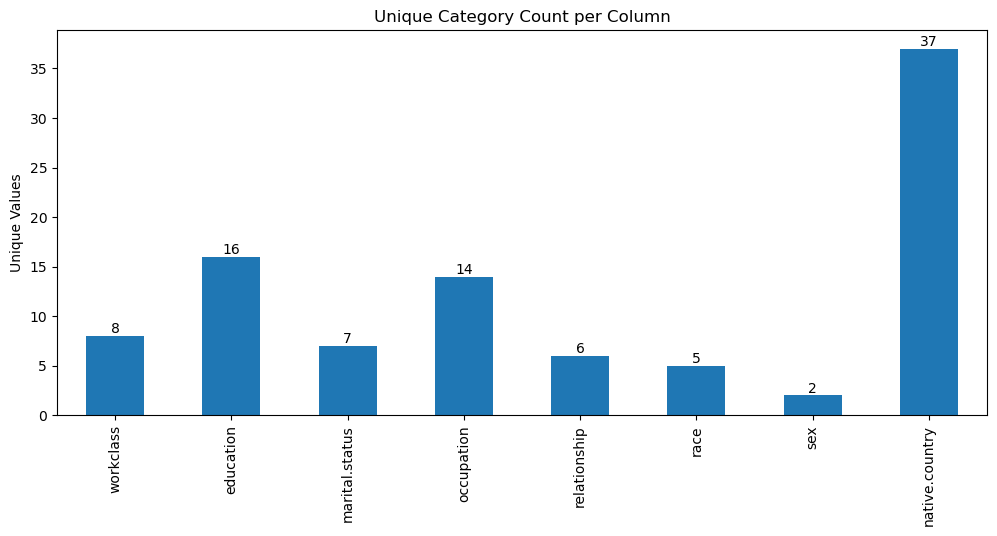

In [20]:
# 막대 그래프 - 변수별 unique 개수를 표시
cat_summary = test.describe(include='object').T
ax = cat_summary['unique'].plot(kind='bar', figsize=(12,5))
ax.set_title("Unique Category Count per Column")
ax.set_ylabel("Unique Values")
ax.bar_label(ax.containers[0])
plt.show()

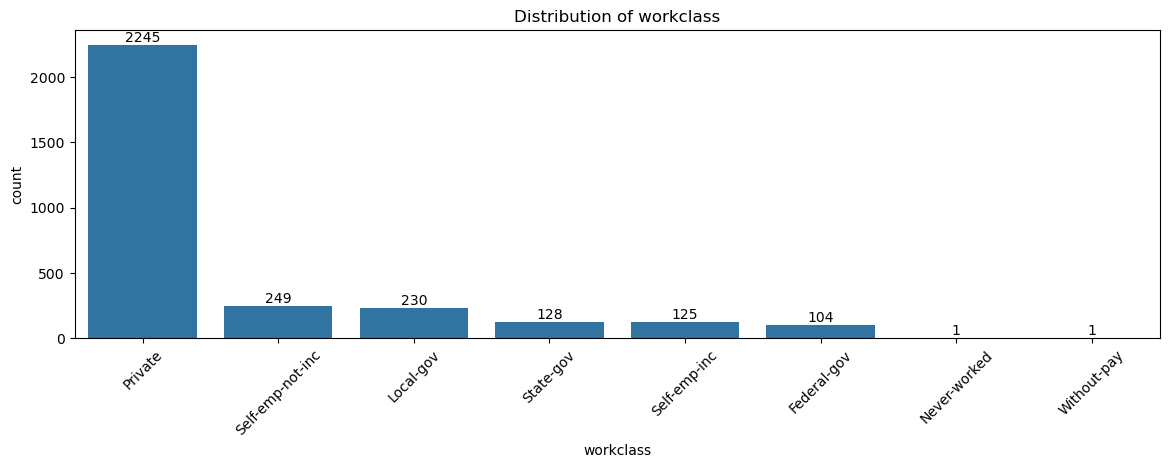

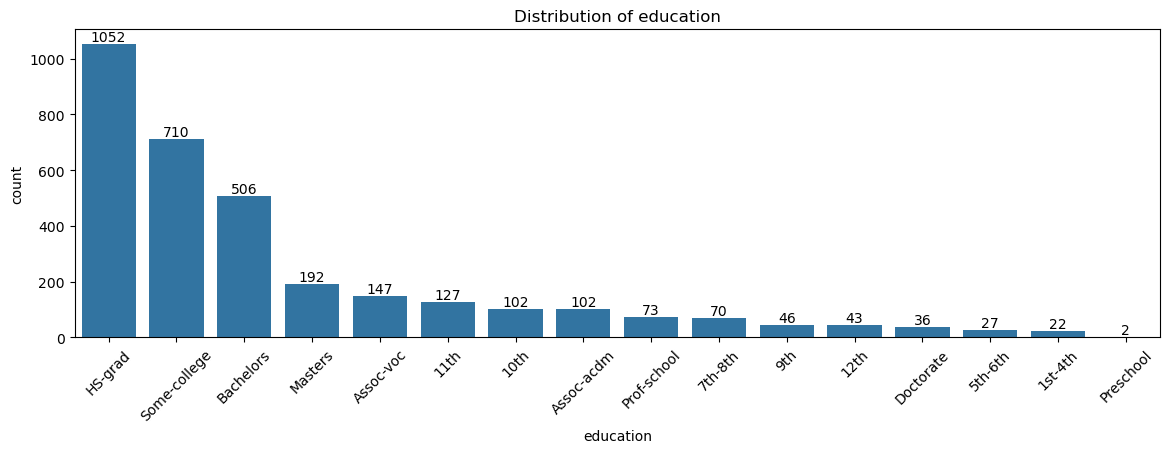

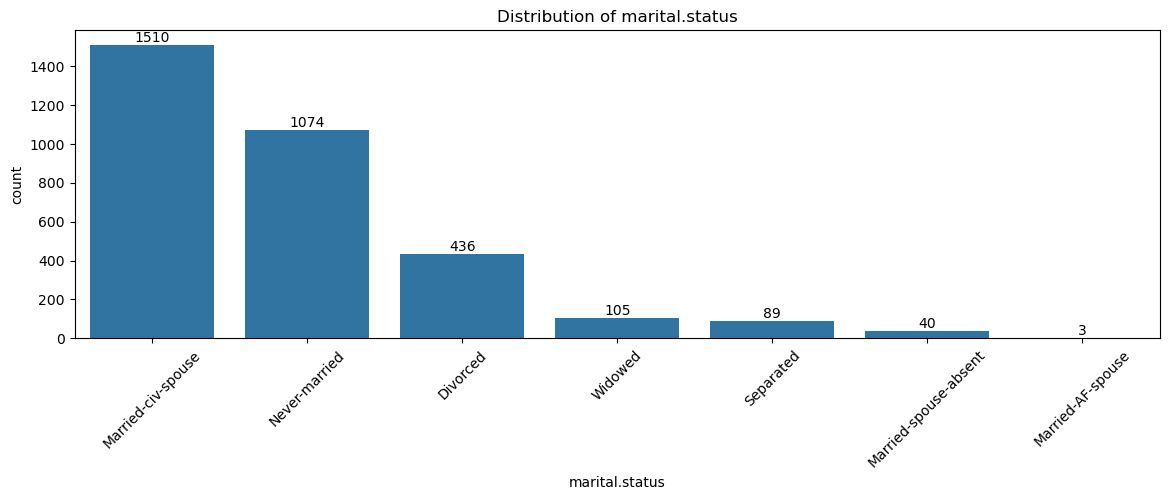

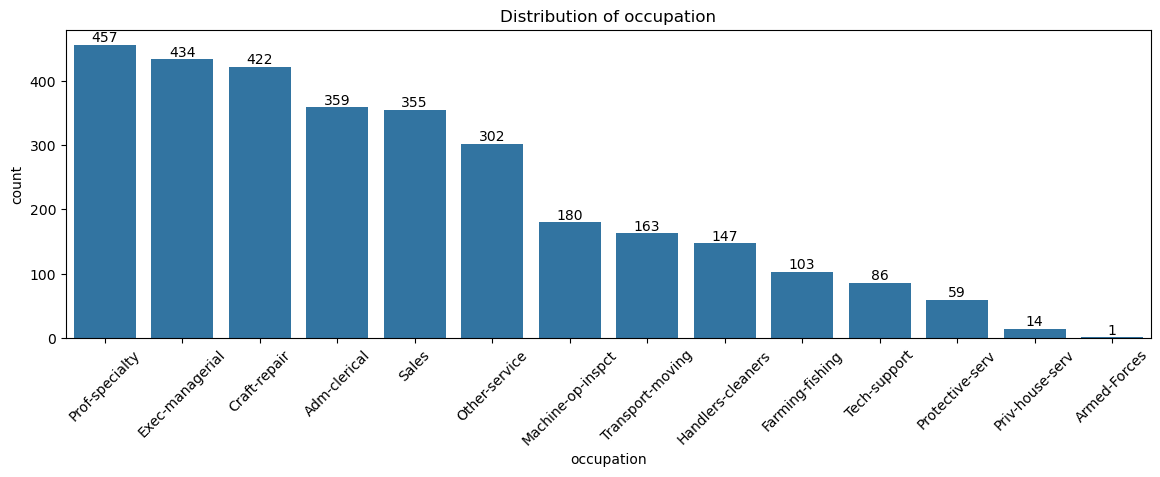

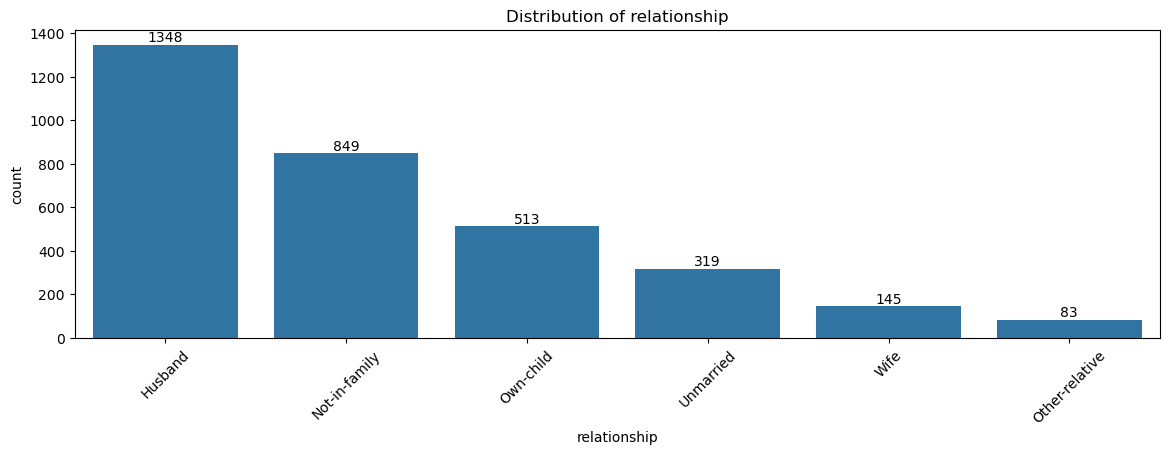

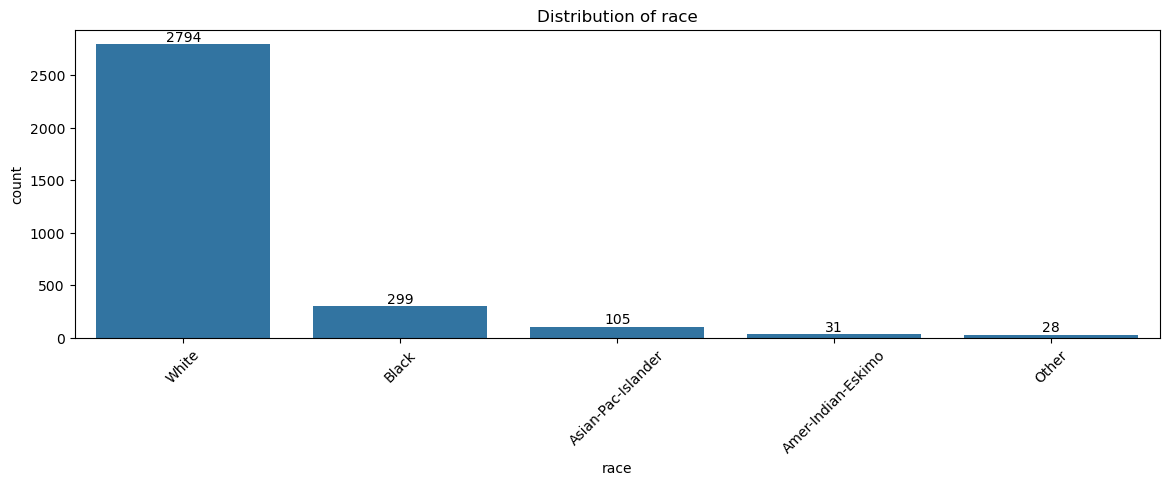

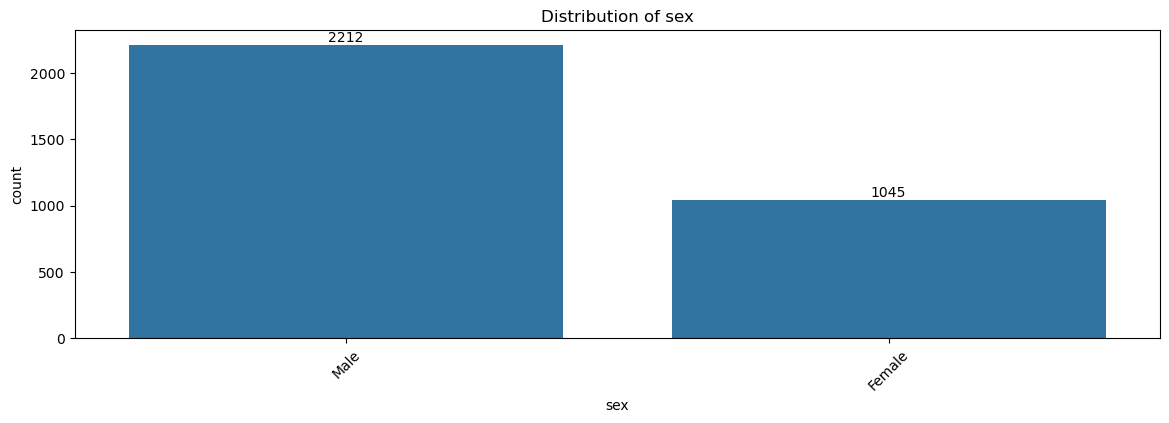

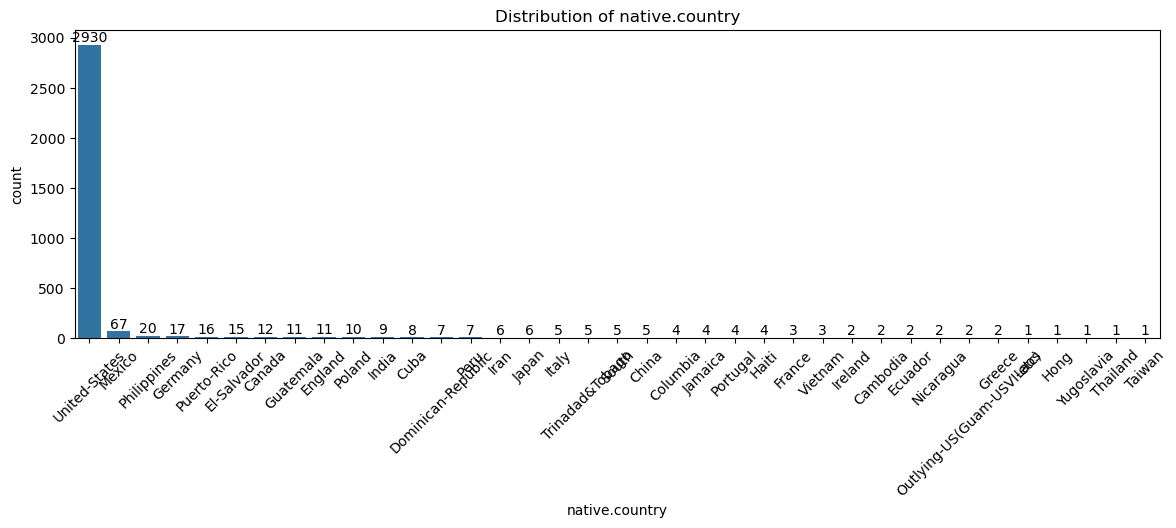

In [21]:
# 막대 그래프 - 카테고리 분포(각 컬럼별)
import seaborn as sns

for col in test.select_dtypes(include='object').columns:
    plt.figure(figsize=(14,4))
    ax = sns.countplot(data=test, x=col, order=test[col].value_counts().index)
    ax.bar_label(ax.containers[0])  # 막대에 값 표시
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

In [22]:
# 보고서 작성
# 전체 데이터 보고서
import sweetviz as sv
report = sv.analyze(train) # train 데이터에 대한 분석 보고서
report.show_html("report.html") # html 파일로 저장

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


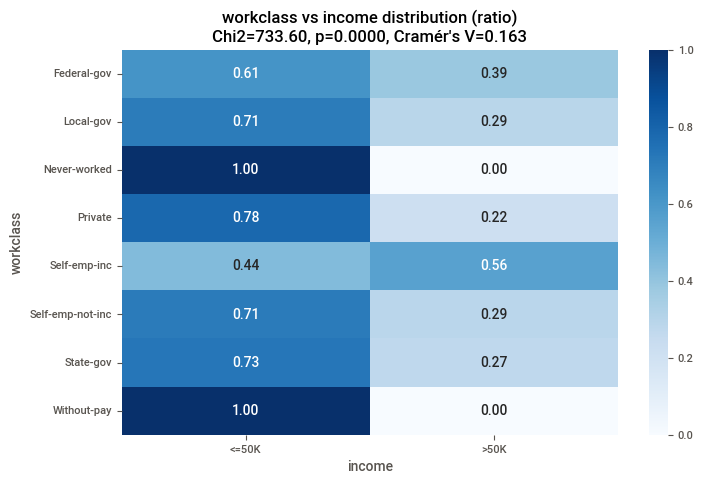

=== workclass vs income ===
Chi-square test:
  chi2 = 733.597, dof = 7, p-value = 0.0000
  Cramér's V = 0.163
Interpretation: Dependent (reject H0)
Effect Size (관계 강도): 중간



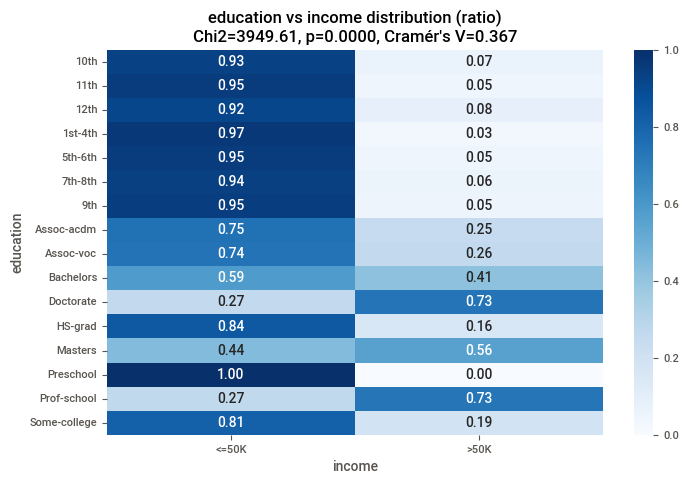

=== education vs income ===
Chi-square test:
  chi2 = 3949.607, dof = 15, p-value = 0.0000
  Cramér's V = 0.367
Interpretation: Dependent (reject H0)
Effect Size (관계 강도): 강함



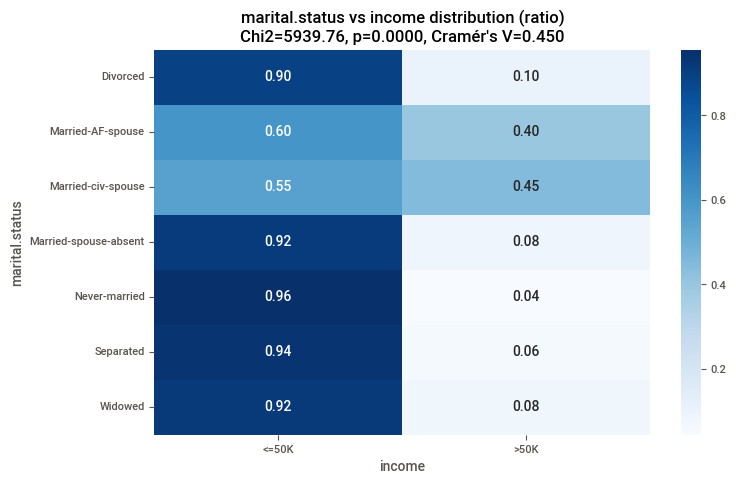

=== marital.status vs income ===
Chi-square test:
  chi2 = 5939.759, dof = 6, p-value = 0.0000
  Cramér's V = 0.450
Interpretation: Dependent (reject H0)
Effect Size (관계 강도): 강함



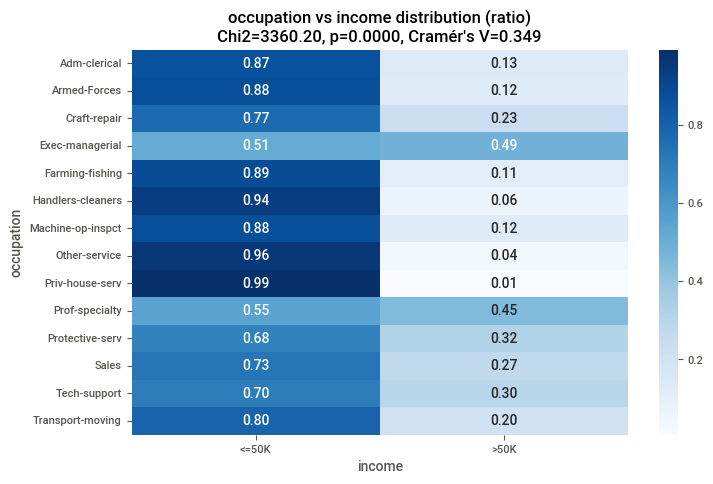

=== occupation vs income ===
Chi-square test:
  chi2 = 3360.200, dof = 13, p-value = 0.0000
  Cramér's V = 0.349
Interpretation: Dependent (reject H0)
Effect Size (관계 강도): 강함



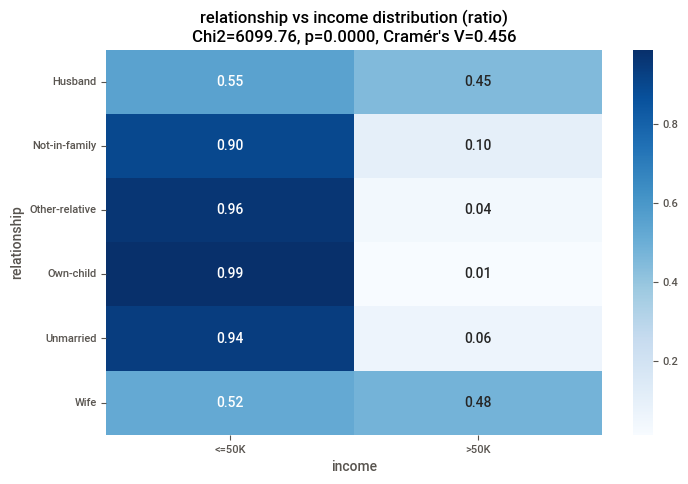

=== relationship vs income ===
Chi-square test:
  chi2 = 6099.760, dof = 5, p-value = 0.0000
  Cramér's V = 0.456
Interpretation: Dependent (reject H0)
Effect Size (관계 강도): 강함



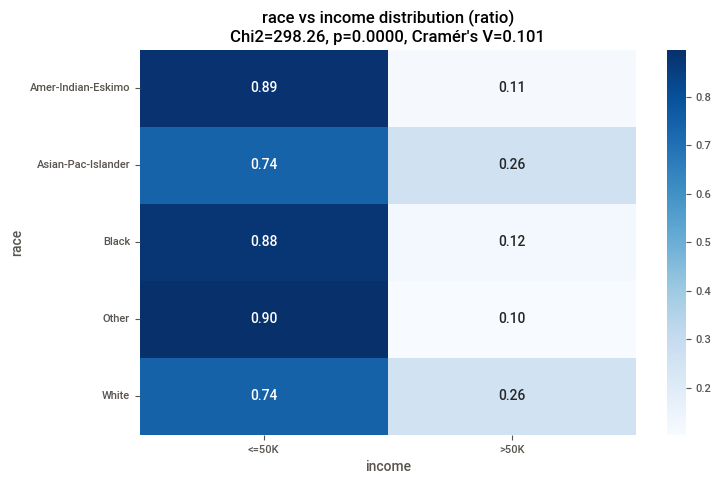

=== race vs income ===
Chi-square test:
  chi2 = 298.260, dof = 4, p-value = 0.0000
  Cramér's V = 0.101
Interpretation: Dependent (reject H0)
Effect Size (관계 강도): 중간



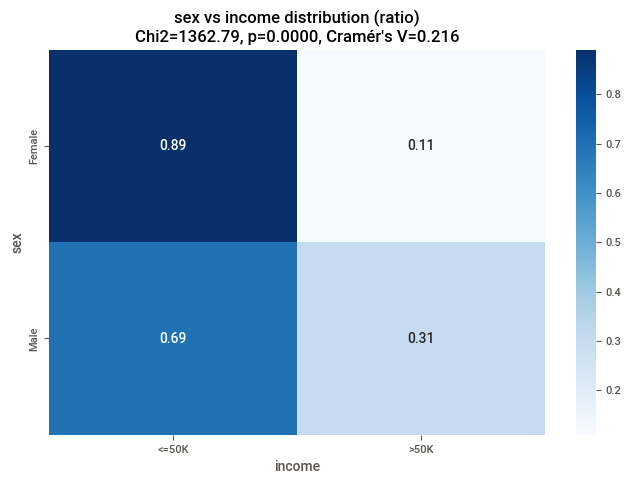

=== sex vs income ===
Chi-square test:
  chi2 = 1362.794, dof = 1, p-value = 0.0000
  Cramér's V = 0.216
Interpretation: Dependent (reject H0)
Effect Size (관계 강도): 중간



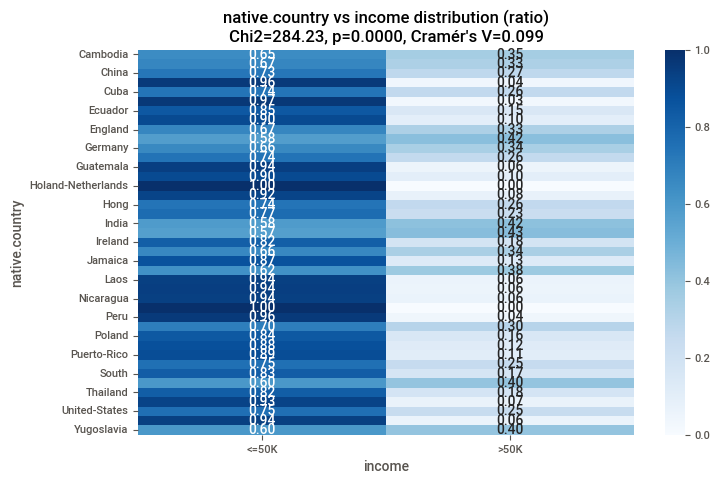

=== native.country vs income ===
Chi-square test:
  chi2 = 284.229, dof = 40, p-value = 0.0000
  Cramér's V = 0.099
Interpretation: Dependent (reject H0)
Effect Size (관계 강도): 약함



In [23]:
# 범주형 컬럼과 income간 교차분석
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Cramér's V 계산 함수
def cramers_v(chi2, n, r, c):
    return np.sqrt(chi2 / (n * (min(r - 1, c - 1))))

# 교차분석할 컬럼들 (income 제외한 범주형 컬럼들)
cat_cols = ["workclass", "education", "marital.status", "occupation", 
            "relationship", "race", "sex", "native.country"]

for col in cat_cols:
    # 1) 교차표 (빈도수)
    cross_counts = pd.crosstab(train[col], train["income"])
    
    # 2) 교차표 (비율, 행 기준)
    cross_ratio = pd.crosstab(train[col], train["income"], normalize="index")

    # 3) 카이제곱 검정
    chi2, p, dof, expected = chi2_contingency(cross_counts)

    # 4) Cramér's V 계산
    n = cross_counts.sum().sum()  # 전체 샘플 수
    r, c = cross_counts.shape     # 행, 열 개수
    cramer_v = cramers_v(chi2, n, r, c)

    # --- 시각화 ---
    plt.figure(figsize=(8, 5))
    sns.heatmap(cross_ratio, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"{col} vs income distribution (ratio)\nChi2={chi2:.2f}, p={p:.4f}, Cramér's V={cramer_v:.3f}")
    plt.ylabel(col)
    plt.xlabel("income")
    plt.show()

    # --- 터미널에 상세 출력 ---
    print(f"=== {col} vs income ===")
    print("Chi-square test:")
    print(f"  chi2 = {chi2:.3f}, dof = {dof}, p-value = {p:.4f}")
    print(f"  Cramér's V = {cramer_v:.3f}")
    if cramer_v < 0.1:
        strength = "약함"
    elif cramer_v < 0.3:
        strength = "중간"
    else:
        strength = "강함"
    print(f"Interpretation: {'Dependent (reject H0)' if p < 0.05 else 'Independent (fail to reject H0)'}")
    print(f"Effect Size (관계 강도): {strength}")
    print()

### 카이제곱(Chi-square) 검정 개요

1. 정의
- **카이제곱(χ²) 검정**은 **관측된 빈도와 기대 빈도의 차이**를 비교하여,  
  두 변수 간의 독립성(연관성 여부)을 검정하는 통계적 방법.  
- 교차표 형태의 **범주형 변수 간 관계**를 분석할 때 주로 사용됨.

---

2. 왜 사용하는가?
1) **범주형 변수와 타깃 간 독립성 검정**  
   - 예: `education`과 `income`이 서로 독립인가?  
   - 귀무가설(H0): 두 변수는 독립이다.  
   - 대립가설(H1): 두 변수는 독립이 아니다(연관성 있음).

2) **데이터의 분포 차이 확인**  
   - 기대빈도(독립이라 가정했을 때의 빈도)와 실제 데이터 분포가 얼마나 다른지 측정.  
   - 차이가 크면 → 독립 아님 → 연관성 존재.

3) **특징 선택 / 변수 중요도 확인**  
   - 소득 예측 모델에서 어떤 범주형 변수가 유의미한지 판단 가능.  
   - 예: `sex`, `marital.status`, `education` 등.

---

### 카이제곱 검정 결과 해석 가이드

1. 왜 p-value가 전부 0이 나올까?

1) **표본 수가 너무 크다**  
- 카이제곱 검정은 표본이 많을수록 아주 작은 차이도 유의하다고 판단.  
- 예: 데이터가 30,000건 이상이면 미세한 분포 차이도 `p < 0.05` → p ≈ 0 근사.

2) **변수와 소득 간 실제 관계가 강하다**  
- 예: `education`과 `income`은 강한 상관성 존재 → 카이제곱 값이 매우 큼 → p ≈ 0.

3) **카이제곱 검정 특성**  
- 귀무가설(H0): “두 변수는 독립이다”  
- 표본이 크면 작은 오차도 누적 → 귀무가설 쉽게 기각 → p ≈ 0.

---

2. 카이제곱 검정 결과에서 보는 값들

- **Chi2 (검정 통계량)**  
  - 실제 관측값과 기대빈도의 차이를 합산한 값.  
  - 값이 클수록 독립이 아닐 가능성이 큼.  
  - 예: `chi2 = 3949.607` → 매우 큰 값 → 변수와 타깃 간 관계 강함.

- **p-value (유의확률)**  
  - 귀무가설(H0: 독립이다)을 기각할 수 있는 확률.  
  - `p < 0.05` → 유의수준 5%에서 H0 기각 → 두 변수는 독립이 아님.  
  - 데이터가 크면 거의 항상 0에 가까움.

- **dof (자유도)**  
  - `(행 개수 - 1) * (열 개수 - 1)`  
  - 교차표의 크기에 따라 결정됨.  
  - 해석보다는 계산 과정의 참고값.

- **expected (기대빈도)**  
  - 두 변수가 독립이라고 가정했을 때 예상되는 값.  
  - 실제 관측값과 기대값 차이가 클수록 Chi2 ↑.

---

3. p-value가 0일 때 주의할 점

- 단순히 “모든 변수가 income과 관련 있다”로 해석하면 안 됨.  
- **효과 크기(Effect Size)** 같이 확인 필요:
  - **Cramér’s V (0~1 사이 값)**  
    - 0.1 = 약한 연관  
    - 0.3 = 중간 연관  
    - 0.5 이상 = 강한 연관
  - Phi 계수 (2×2 교차표에 사용)

---

4. 예시 해석


=== education vs income  === 

Chi2 = 3949.607, dof = 15, p-value = 0.0000
Interpretation: Dependent (reject H0)


- **Chi2=3949.6**: 기대빈도와 실제빈도 차이가 매우 큼 → 강한 관련성 있음.  
- **p-value=0.0000**: 유의수준 5%에서 H0 기각 → education과 income은 독립이 아님.  
- **dof=15**: education(16개) × income(2개)에서 나온 자유도.  
- **실질적 의미**: 교육 수준이 높아질수록 소득 분포가 달라지는 패턴 존재.  
  - 예: HS-grad의 경우 low-income 비율이 높고, Doctorate는 high-income 비율이 높음.


---

5. 결론

- p-value가 0인 것은 이상한 것이 아니라, **표본 수가 크거나 실제 차이가 존재**하기 때문.  
- 해석 시 **Chi2 값의 크기, 효과 크기(Cramér’s V), 교차표 시각화(Heatmap)**를 같이 봐야 의미 있는 결론 도출 가능.


###  카이제곱 + 효과 크기(Cramér's V) 분석

1. 카이제곱 검정 정의
- **목적**: 두 범주형 변수가 서로 독립인지(관련 없음) 혹은 연관이 있는지(관련 있음) 통계적으로 검정  
- **귀무가설(H0)**: 두 변수는 독립이다  
- **대립가설(H1)**: 두 변수는 독립이 아니다  
- **p-value 해석**:  
  - p < 0.05 → 귀무가설 기각 → 변수와 소득이 관련 있음  
  - p ≥ 0.05 → 귀무가설 기각 불가 → 변수와 소득이 독립  

2. 효과 크기 (Cramér's V)
- 카이제곱 검정은 표본이 크면 거의 모든 변수가 유의하게(p≈0) 나올 수 있음  
- 따라서 실제 **관계 강도**를 보기 위해 Cramér's V 사용  
- **해석 기준**:
  - 0.1 = 약함
  - 0.3 = 중간
  - 0.5 = 강함  

---

3. 결과 해석

(1) 관계 강도가 강한 변수들
- **marital.status (Cramér's V = 0.450, 강함)**  
  → 혼인 상태는 소득과 가장 강한 연관성이 있음.  
  기혼(특히 married-civ-spouse)일수록 고소득 비율이 높음.  

- **relationship (0.456, 강함)**  
  → "가장(Husband)"일 때 고소득 비율이 매우 높음.  
  "자녀/other-relative" 등은 저소득 비율이 높음.  

- **education (0.367, 강함)**  
  → 교육 수준이 높을수록 고소득 가능성이 커짐.  
  HS-grad(고졸) vs Doctorate(박사) 간 소득 차이 큼.  

- **occupation (0.349, 강함)**  
  → 전문직/관리직(Prof-specialty, Exec-managerial)은 고소득,  
  서비스/노동직은 저소득 비율 높음.  

---

(2) 관계 강도가 중간인 변수들
- **workclass (0.163, 중간)**  
  → Private, Self-emp, Government 고용 형태별 소득 차이 있음.  
  하지만 education, marital.status보다는 영향 약함.  

- **sex (0.216, 중간)**  
  → 남성이 여성보다 고소득 비율이 높음.  
  그러나 단독보다는 직업/교육과 함께 해석 필요.  

- **race (0.101, 중간~약함 경계)**  
  → 인종별 차이는 있으나 영향력은 미미.  
  다른 변수 대비 설명력이 낮음.  

---

(3) 관계 강도가 약한 변수
- **native.country (0.099, 약함)**  
  → 출신 국가와 소득의 관계는 거의 없음.  
  대부분 미국 데이터(>90%)라서 영향이 희석됨.  

---

4. 종합 결론
- **핵심 변수**: `education`, `marital.status`, `occupation`, `relationship`  
- **보조 변수**: `sex`, `workclass`  
- **거의 영향 없음**: `race`, `native.country`  

---

5. 실무 적용 포인트
- Feature Engineering 시 **교육, 혼인 상태, 직업, 가족관계** 변수는 반드시 반영  
- 성별, 고용 형태는 보조적 변수로 유지  
- 인종, 출신 국가는 제거해도 모델 성능에 큰 영향 없을 수 있음  
- 단순 p-value 보다는 **효과 크기(Cramér's V)** 중심으로 변수 중요도를 해석하는 것이 유용함

In [24]:
# 수치형 상관관계
n_train = train.select_dtypes(include=['number']) # 수치형 데이터만 뽑아내는 작업 필요
n_train
n_train.corr()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
id,1.000000,-0.077323,0.003550,-0.090382,-0.221315,-0.358569,-0.056766
age,-0.077323,1.000000,-0.075860,0.035072,0.077384,0.059372,0.068504
fnlwgt,0.003550,-0.075860,1.000000,-0.039059,0.000265,-0.009576,-0.018948
education.num,-0.090382,0.035072,-0.039059,1.000000,0.125894,0.079391,0.147519
capital.gain,-0.221315,0.077384,0.000265,0.125894,1.000000,-0.031605,0.081179
capital.loss,-0.358569,0.059372,-0.009576,0.079391,-0.031605,1.000000,0.053508
hours.per.week,-0.056766,0.068504,-0.018948,0.147519,0.081179,0.053508,1.000000


In [25]:
# # 참고] 수치형 상관관계 분석도구
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # income을 0/1로 변환
# train['income_bin'] = (train['income'] == '>50K').astype(int)

# # 수치형 변수와 타깃과의 상관계수 확인
# corr = train.corr(numeric_only=True)

# print(corr['income_bin'].sort_values(ascending=False))

# # 히트맵 시각화
# plt.figure(figsize=(8,6))
# sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
# plt.title("Correlation Matrix (including income_bin)")
# plt.show()

In [26]:
# test 범주형 컬럼 통계값 확인
test.describe(include='object') 

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,3083,3257,3257,3082,3257,3257,3257,3211
unique,8,16,7,14,6,5,2,37
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,2245,1052,1510,457,1348,2794,2212,2930


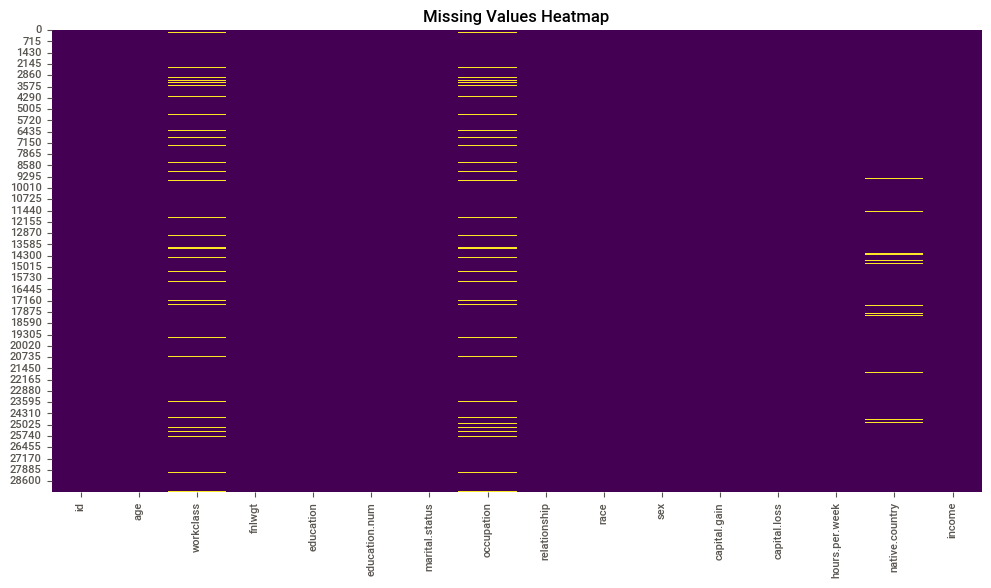

In [27]:
# 3#. 히트맵 (결측치 위치 패턴 보기)
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

<Axes: >

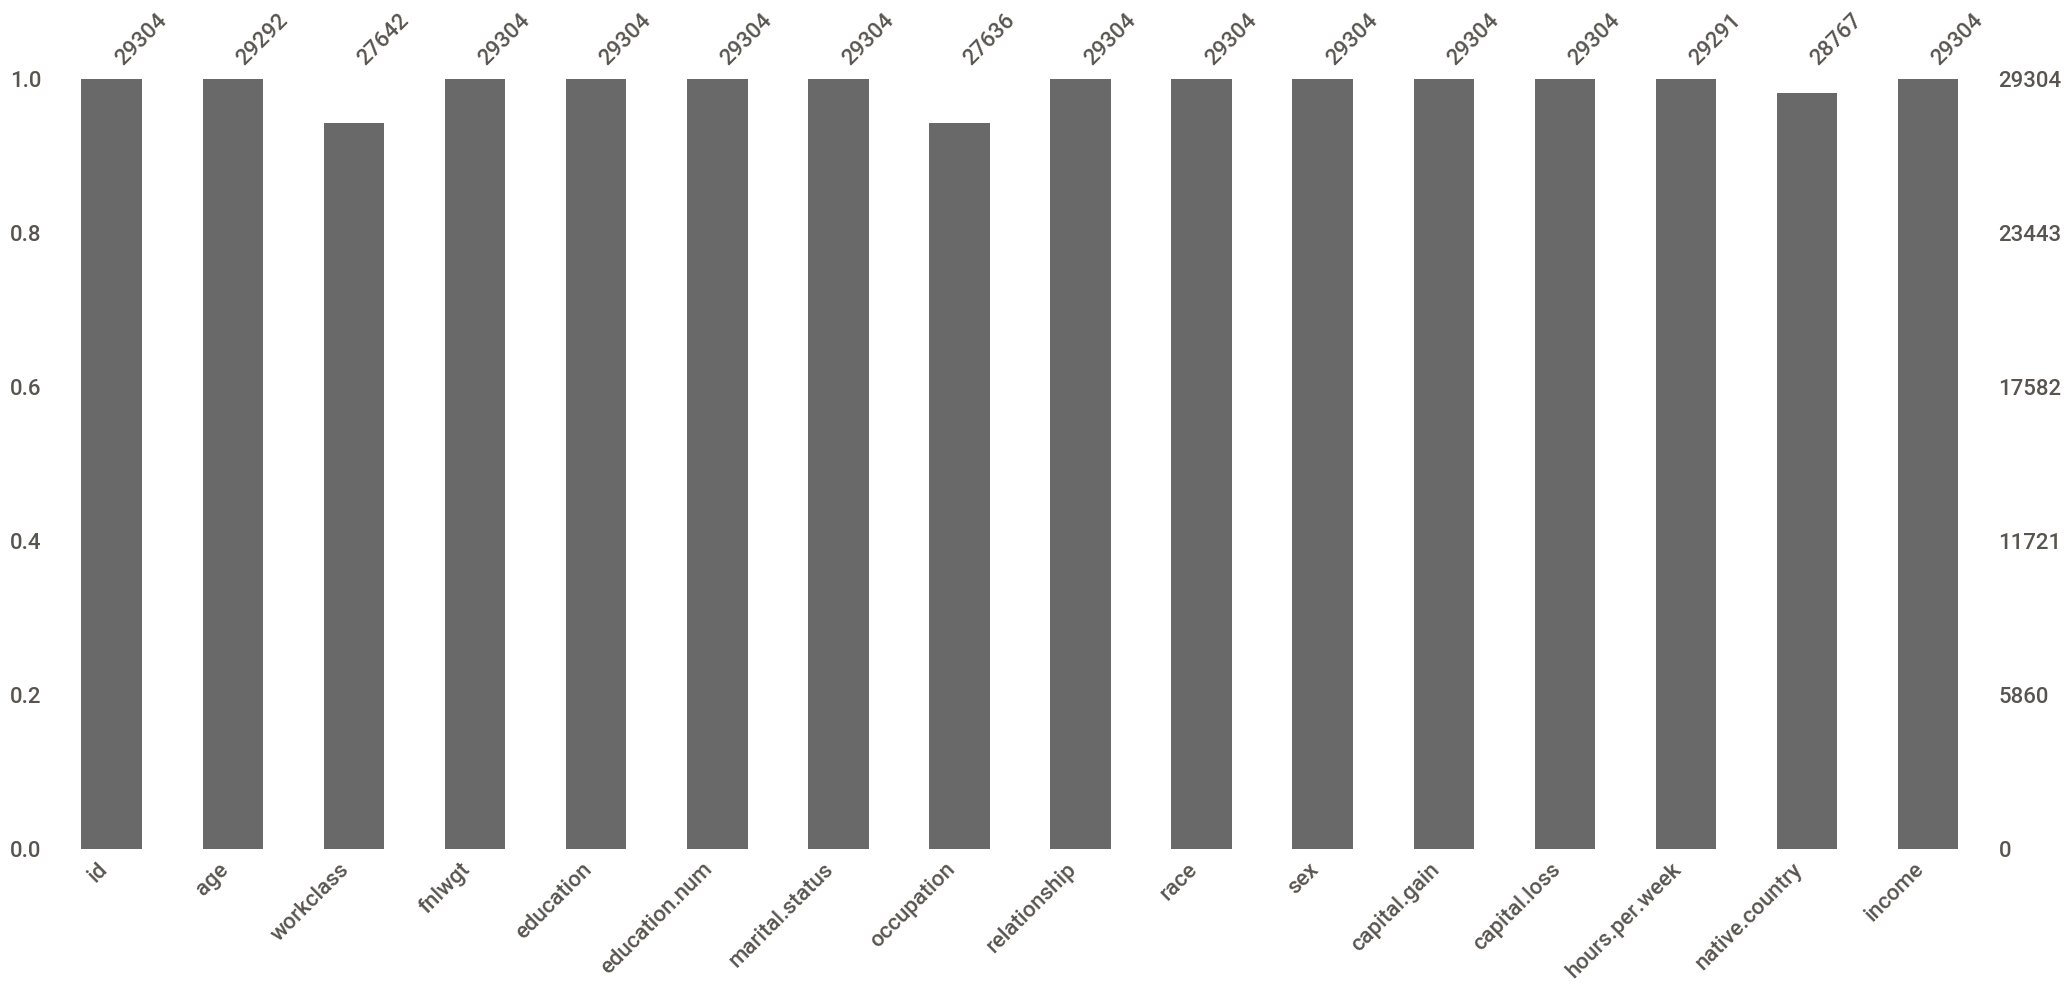

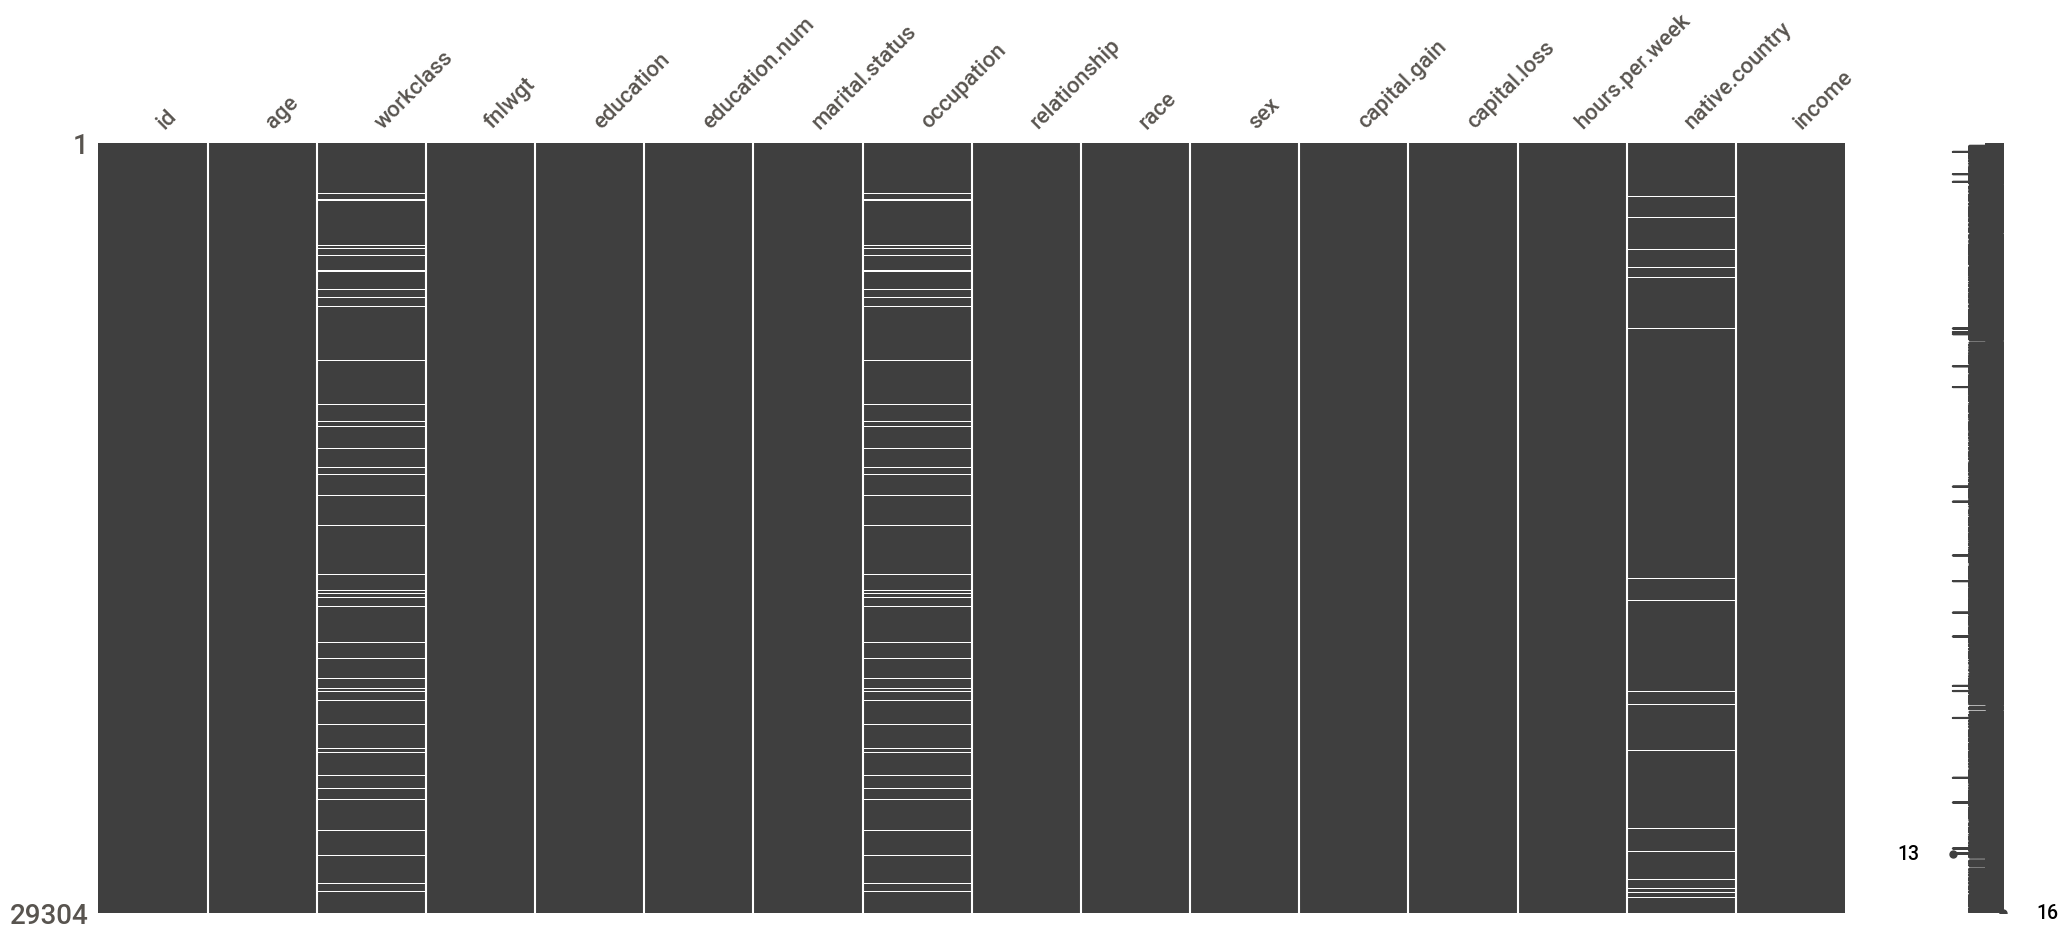

In [28]:
#4. 시각화 도구 활용 (옵션)
#missingno 라이브러리 사용 (requirements.txt에 이미 있음)

import missingno as msno

# 결측치 막대 그래프
msno.bar(train)

# 결측치 히트맵
msno.matrix(train)

# 결측치 상관관계
# msno.heatmap(train)

### 결측치

In [29]:
train.isnull().sum()

id                   0
age                 12
workclass         1662
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week      13
native.country     537
income               0
dtype: int64

In [30]:
test.isnull().sum()

id                  0
age                 6
workclass         174
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        175
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      9
native.country     46
dtype: int64

In [31]:
### labe(target)별 개수 확인

In [32]:
train['income'].value_counts()

income
<=50K    22263
>50K      7041
Name: count, dtype: int64

## 3 데이터 전처리

In [33]:
# 비교를 위한 원본 데이터 불러오기
origin_train = pd.read_csv('origin/train.csv')
origin_test = pd.read_csv('origin/test.csv')

### 결측치 처리

In [34]:
# 결측치 확인
# 각 컬럼별 결측치 개수
print(train.isnull().sum())
print()
# 전체 결측치 합계
print(train.isnull().sum().sum())
print()
# 전체행 대비 결측치 비율 - 비어있는게 많은 값은 어떻게 하면 채워넣을지 생각
print((train.isnull().sum()/len(train)))
print()
# 결측치 있는 컬럼만 출력
print(train.columns[train.isnull().any()])

id                   0
age                 12
workclass         1662
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week      13
native.country     537
income               0
dtype: int64

3892

id                0.000000
age               0.000410
workclass         0.056716
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056921
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000444
native.country    0.018325
income            0.000000
dtype: float64

Index(['age', 'workclass', 'occupation', 'hours.per.week', 'native.country'], dtype='object')


In [35]:
# 결측값 삭제(행삭제)
print("결측 행 삭제처리 전 : ", train.shape)

# 결측값 모두 삭제
df = train.dropna(); # train 자체에는 처리가 안되어있고 결측값 처리된 데이터를 df로 생성
# train.dropna(inplace=True); # train에서 결측값 모두 삭제

# 범주형 데이터 삭제
df = train.dropna(subset=['workclass', 'occupation'])
print("결측 행 삭제처리 후 : ", df.shape)

결측 행 삭제처리 전 :  (29304, 16)
결측 행 삭제처리 후 :  (27636, 16)


In [36]:
# 결측값 삭제(열삭제)
print("결측 행 삭제처리 전 : ", train.shape)

# 결측값 모두 삭제
# df = train.dropna(axis=1); # 열 자체에 결측치 확인 

# subset은 dropna에서 사용가능
df = train.drop(columns=['workclass', 'occupation'], axis=1)
print("결측 행 삭제처리 후 : ", df.shape)

결측 행 삭제처리 전 :  (29304, 16)
결측 행 삭제처리 후 :  (29304, 14)


### 결측치 채우기

In [37]:
# 결측치 채우기(최빈값)
train.describe(include="O")

# workclass 열에서 최빈값 찾기
# mode() : 최빈값들을 Series 형태로 반환
m1 = train['workclass'].mode()[0] # Private
train['workclass'] = train['workclass'].fillna(m1) # workclass 열의 결측치를 Private로 채우기
train.isnull().sum() # workclass 결측치 확인

m2 = train['native.country'].mode()[0] # United-States
train['native.country'] = train['native.country'].fillna(m2)
train.isnull().sum()

id                   0
age                 12
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week      13
native.country       0
income               0
dtype: int64

In [38]:
# 결측치 채우기(새로운 카테고리(X)로 분류)
train['occupation'] = train['occupation'].fillna('X')
train['occupation'].value_counts()  # X 값이 1668개 생긴 것 확인

occupation
Prof-specialty       3683
Craft-repair         3677
Exec-managerial      3632
Adm-clerical         3411
Sales                3295
Other-service        2993
Machine-op-inspct    1822
X                    1668
Transport-moving     1434
Handlers-cleaners    1223
Farming-fishing       891
Tech-support          842
Protective-serv       590
Priv-house-serv       135
Armed-Forces            8
Name: count, dtype: int64

In [39]:
# 결측치 채우기(수치형 - 평균값)
value = int(train['age'].mean()) # int로 해도 train.info 확인시 int형으로 변경되지 X
value
train['age'] = train['age'].fillna(value)
train.isnull().sum()
# train.info()

id                 0
age                0
workclass          0
fnlwgt             0
education          0
education.num      0
marital.status     0
occupation         0
relationship       0
race               0
sex                0
capital.gain       0
capital.loss       0
hours.per.week    13
native.country     0
income             0
dtype: int64

In [40]:
# 결측치 채우기(수치형 - 중앙값)
value = int(train['hours.per.week'].median())
value
train['hours.per.week'] = train['hours.per.week'].fillna(value)
train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [41]:
# test 데이터 결측치 처리(train에서 했던 것과 동일하게)
test.isnull().sum() # age, workclass, occupation, hours.per.week, native.country 결측치 존재 확인

# age - 평균값으로
test['age'] = test['age'].fillna(int(test['age'].mean()))
# test.isnull().sum()

# workclass - 최빈값으로
test['workclass'] = test['workclass'].fillna(test['workclass'].mode()[0])
# test['workclass'].mode()[0] # Private 확인
# test.isnull().sum() 확인 작업하면서 코드 재실행

# occupation - 새로운 카테고리 X로
test['occupation'] = test['occupation'].fillna('X')
test.isnull().sum()
# test['occupation'].value_counts() # X 데이터 결측치(175)만큼 생성

# hours.per.week - 중앙값으로
test['hours.per.week'] = test['hours.per.week'].fillna(int(test['hours.per.week'].median()))
# test.isnull().sum()

# native.country - 최빈값
test['native.country'] = test['native.country'].fillna(test['native.country'].mode()[0])
test.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

### 이상치 처리

In [42]:
train.describe()
# age min : -38

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,29304.000000,29304.000000,2.930400e+04,29304.000000,29304.000000,29304.000000,29304.000000
mean,16264.027880,38.552996,1.897488e+05,10.080842,1093.858722,86.744506,40.434036
std,9384.518323,13.626025,1.055250e+05,2.570824,7477.435640,401.518928,12.321306
min,0.000000,-38.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8145.750000,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,16253.500000,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000
75%,24374.250000,48.000000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


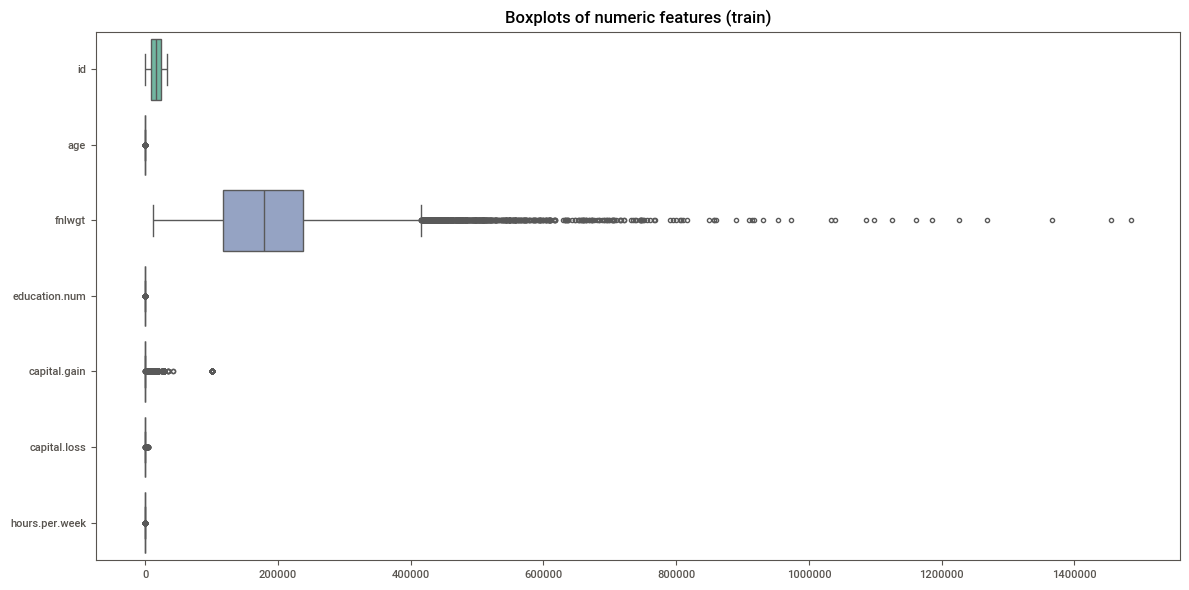

In [43]:
# 시각화 - 박스플롯 - 박스플롯이란
# --------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼만 추출
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=train[numeric_cols], orient="h", palette="Set2")
plt.title("Boxplots of numeric features (train)")
plt.tight_layout()
plt.show()

In [44]:
train[train['age']<=0] # 39, 79, 26161 행의 age가 음수값
# test[test['age']<=0] # test의 age 음수값은 X
# test.describe()

# 이상치 제거(age > 0 큰 데이터들만 train에 포함)
train = train[train['age']>0]
train[train['age']<=0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### 인코딩

In [45]:
train['income']

0         >50K
1        <=50K
2        <=50K
3         >50K
4        <=50K
         ...  
29299    <=50K
29300    <=50K
29301    <=50K
29302    <=50K
29303    <=50K
Name: income, Length: 29301, dtype: object

In [47]:
# 종속변수(y) 분리
y_train = train.pop("income") # 한번 실행 후 또 실행하면 오류 발생 -> 한번 실행 후 주석 처리 다시 실행

In [48]:
print(y_train)
print("===================="*3)
train.head()
print(train.shape, test.shape) # 열의 수가 같아진 것 확인

0         >50K
1        <=50K
2        <=50K
3         >50K
4        <=50K
         ...  
29299    <=50K
29300    <=50K
29301    <=50K
29302    <=50K
29303    <=50K
Name: income, Length: 29301, dtype: object
(29301, 15) (3257, 15)


In [49]:
# 원-핫 인코딩(범주형 값을 수치형으로)
# 각 범주를 새로운 이진 컬럼으로 생성하여 0/1로 표시
# -> 범주형 데이터의 순서, 서열 의미 제거 가능 but 범주 수가 많을 경우 차원이 커져 희소행렬 문제 발생
train_oh = pd.get_dummies(train)
# train_oh
test_oh = pd.get_dummies(test)
# test_oh

print(train.shape, test.shape, train_oh.shape, test_oh.shape) # 원핫인코딩시 컬럼 불일치

(29301, 15) (3257, 15) (29301, 107) (3257, 103)


In [50]:
# 원-핫 인코딩 train_oh, test_oh 컬럼 불일치 문제 해결
print(train.shape, test.shape)  # 원본 데이터 크기
data = pd.concat([train, test], axis=0)  # 두 데이터를 세로로 합치기
data_oh = pd.get_dummies(data)  # 합친 데이터로 원핫 인코딩
train_oh = data_oh.iloc[:len(train)].copy()  # 앞부분을 학습용으로 분리
test_oh = data_oh.iloc[len(train):].copy()  # 뒷부분을 시험용으로 분리
print(train_oh.shape, test_oh.shape)  # 분리 후 크기 확인

(29301, 15) (3257, 15)
(29301, 107) (3257, 107)


In [ ]:
# 원-핫 인코딩 적용 주석


In [51]:
# 레이블 인코딩
# train에서 dtype이 object인 컬럼들만 선택해서 반환
# 1) 
# train.select_dtypes(include="O")
# cols = train.select_dtypes(include="O").columns

# 2) 
# cols = train.columns[train.dtypes == object]
# cols
# Index 순서대로 순서가 부여

cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [52]:
# 레이블 인코딩을 실제 train, test에 적용
from sklearn.preprocessing import LabelEncoder

for col in cols:
    le = LabelEncoder() # 
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

train.head()
# 경고 발생 -> .loc를 사용하거나 dataframe 생성시 copy() 사용을 권장

/tmp/ipykernel_19743/2852563067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])
/tmp/ipykernel_19743/2852563067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])
/tmp/ipykernel_19743/2852563067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3331,34.0,6,177331,15,10,2,9,0,2,1,4386,0,40.0,38
1,19749,58.0,3,290661,11,9,2,2,0,4,1,0,0,40.0,38
2,1157,48.0,3,125933,15,10,6,3,4,2,0,0,1669,38.0,38
3,693,58.0,3,100313,15,10,2,10,0,4,1,0,1902,40.0,38
4,12522,41.0,3,195661,15,10,2,13,0,4,1,0,0,54.0,38


In [53]:
train
test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,11574,39.0,6,114055,9,13,4,3,1,4,0,0,0,40.0,38
1,15847,38.0,3,254114,15,10,3,9,3,2,0,0,0,40.0,38
2,17655,44.0,6,55395,11,9,4,2,1,4,1,0,0,40.0,38
3,19790,47.0,3,28035,9,13,2,3,0,4,1,0,0,50.0,38
4,31812,62.0,3,186611,11,9,4,14,1,4,1,0,0,40.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,20589,28.0,1,202558,15,10,4,3,3,4,0,0,0,40.0,38
3253,5668,52.0,3,94391,11,9,2,0,0,4,1,0,0,40.0,38
3254,27652,25.0,1,109526,11,9,2,2,0,4,1,0,0,38.0,38
3255,14735,36.0,3,242713,11,9,0,0,4,2,0,0,0,40.0,38


In [54]:
# 타겟 라벨링 
y_train.value_counts() # 기본 정보 확인 

# 방법1 - map() 은 딕셔너리 매핑을 통해 문자열을 숫자로 치환
target = y_train.map({'<=50K':0, '>50K':1})
target.value_counts()

# 방법2 - replace()도 특정 값을 다른 값으로 치환
# 결과적으로 map()과 동일한 결과
# target = y_train.replace('<=50K', 0).replace('>50K', 1)
# target.value_counts()

income
0    22262
1     7039
Name: count, dtype: int64

## 4 검증 데이터 나누기

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train,        # 입력 데이터(독립 변수, Feature)
    y_train,      # 정답 데이터(종속 변수, Label) - sklearn 에서는 문자열클래스도 가능 / 딥러닝은 힘듬
    test_size=0.2,    # 전체 데이터의 20%를 검증용으로 분리
    random_state=0    # 데이터 분할 시 랜덤 시드 고정 (재현성) , 기본값 :데이터 무작위 셔플->성능결과달라짐
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((23440, 15), (5861, 15), (23440,), (5861,))

## 5 머신러닝 학습
- 트리기반 알고리즘 비교
  - 의사결정나무(Decision Tree)
  - 랜덤포레스트(Random Forest)
  - XGBoost(Extreme Gradient Boosting)
  - LightGBM(Light Gradient Boosting Machine)

In [57]:
# 문자열 데이터가 모두 숫자형으로 변환이 되어야 머신러닝 학습이 가능
print(X_train.dtypes)
print(X_train.select_dtypes(include='object').head())

id                  int64
age               float64
workclass           int64
fnlwgt              int64
education           int64
education.num       int64
marital.status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital.gain        int64
capital.loss        int64
hours.per.week    float64
native.country      int64
dtype: object
Empty DataFrame
Columns: []
Index: [17881, 10082, 29155, 13967, 11962]


In [56]:
# 랜덤포레스트
# ----------------------------
# 배깅 기반 앙상블: 여러 트리를 부트스트랩 샘플로 학습시켜 예측을 종합하는 방식
# 과적합 완화: 다수의 트리를 결합해 단일 트리보다 일반화 성능을 높임
# 변수 중요도 제공: 각 특성이 예측에 기여한 정도를 계산해 Feature Importance 제공
# 랜덤성 + 다수결: 무작위 데이터·특성으로 다양한 트리를 만들고 최종 예측은 다수결/평균으로 결정

from sklearn.ensemble import RandomForestClassifier  
# sklearn.ensemble 모듈에서 RandomForestClassifier(랜덤 포레스트 분류기) 불러오기
# 랜덤포레스트는 여러 개의 결정트리(Decision Tree)를 앙상블하여 예측 성능을 높이는 알고리즘

rf = RandomForestClassifier(random_state=0)  
# 랜덤포레스트 분류기 객체 생성
# random_state=0 → 난수 시드 고정 (재현성 확보: 같은 데이터로 돌리면 항상 같은 모델 결과 나옴)

rf.fit(X_train, y_train)  
# 모델 학습(훈련 단계)
# X_train : 학습 데이터의 입력값(Feature)
# y_train : 학습 데이터의 정답(Label)
# → 다수의 결정트리를 만들고, 학습 데이터에 대해 분류 규칙을 학습

pred = rf.predict_proba(X_val)  
# 검증 데이터(X_val)에 대해 각 클래스에 속할 **확률값**을 예측
# 반환값은 (샘플 개수 × 클래스 개수)의 2차원 배열
# 예: 이진분류라면 [ [0.2, 0.8], [0.7, 0.3], ... ] 형태로 출력
#    → 첫 번째 값은 "클래스 0일 확률", 두 번째 값은 "클래스 1일 확률"

pred
# pred[:10]  
# 예측된 확률값 중 상위 10개 샘플만 출력
# 각 행은 하나의 샘플에 대한 클래스별 확률 분포를 의미

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.9 , 0.1 ],
       ...,
       [1.  , 0.  ],
       [0.74, 0.26],
       [1.  , 0.  ]])